# Text Mining Project

Description

## 1. Installs and Imports

In [1]:
#pip install pandas
#!pip install langdetect
#!pip install matplotlib
#!pip install seaborn 
#!pip install re
#!pip install openpyxl
#!pip install googletrans==4.0.0-rc1
#!pip install tqdm
#!pip install wordcloud
#!pip install nltk
#!pip install google-cloud-translate
#!pip install emoji
#!pip install konlpy
#!pip install spacy
#!pip install unicode
#!pip install scikit-learn
#!pip install textblob
#!pip install gensim
#!pip install scipy==1.12.0

In [2]:
#Spacy Installs
#!python -m spacy download en_core_web_sm
#!python -m spacy download fr_core_news_sm
#!python -m spacy download pt_core_news_sm
#!python -m spacy download es_core_news_sm
#!python -m spacy download de_core_news_sm
#!python -m spacy download it_core_news_sm
#!python -m spacy download nl_core_news_sm
#!python -m spacy download sv_core_news_sm
#!python -m spacy download fi_core_news_sm
#!python -m spacy download da_core_news_sm
#!python -m spacy download ro_core_news_sm
#!python -m spacy download nb_core_news_sm

In [3]:
# Install NLTK if not already installed
try:
    import nltk
except ImportError:
    import os
    os.system('pip install nltk')
    import nltk

# Download the stopwords dataset
nltk.download('stopwords')

nltk.download('wordnet')

# Import the stopwords from NLTK
from nltk.corpus import stopwords

# Define stopwords for all languages
stopwords_dict = {
    'en': set(stopwords.words('english')),
    'fr': set(stopwords.words('french')),
    'de': set(stopwords.words('german')),
    'es': set(stopwords.words('spanish')),
    'pt': set(stopwords.words('portuguese')),
    'it': set(stopwords.words('italian')),
    'nl': set(stopwords.words('dutch')),
    'sv': set(stopwords.words('swedish')),
    'fi': set(stopwords.words('finnish')),
    'da': set(stopwords.words('danish')),
    'ro': set(stopwords.words('romanian')),
    'no': set(stopwords.words('norwegian'))
}

# Verify that the stopwords have been loaded
for lang, words in stopwords_dict.items():
    print(f"Stopwords for {lang}: {list(words)[:10]}...")  # Print first 10 stopwords for each language


Stopwords for en: ["wouldn't", 'shan', "needn't", 'few', 'an', 'here', 'she', 'about', 'then', 'ours']...
Stopwords for fr: ['votre', 'ait', 'notre', 'un', 'soyons', 'aurions', 'en', 'seriez', 'soit', 'aurons']...
Stopwords for de: ['werden', 'auch', 'die', 'aber', 'dir', 'seiner', 'doch', 'an', 'meine', 'wo']...
Stopwords for es: ['tuve', 'habremos', 'hube', 'éramos', 'sí', 'habríais', 'hubieras', 'vuestra', 'habíamos', 'estéis']...
Stopwords for pt: ['tenha', 'pelas', 'sejam', 'tém', 'deles', 'houverão', 'tiver', 'seu', 'haver', 'na']...
Stopwords for it: ['faresti', 'farebbe', 'degli', 'sui', 'un', 'fossero', 'starebbero', 'avete', 'abbiano', 'stetti']...
Stopwords for nl: ['dan', 'ben', 'die', 'doch', 'u', 'en', 'tot', 'zal', 'na', 'kon']...
Stopwords for sv: ['och', 'som', 'en', 'vilket', 'sedan', 'från', 'ett', 'samma', 'ingen', 'vem']...
Stopwords for fi: ['ketkä', 'olemme', 'meitä', 'sille', 'heiltä', 'heihin', 'tuolla', 'en', 'tai', 'häneltä']...
Stopwords for da: ['fra', 'alt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\TCastilho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TCastilho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [1]:
# Standard library imports
import re
import string
import unicodedata
from collections import Counter

# Data manipulation and visualization imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing imports
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from langdetect import detect
from googletrans import Translator
from google.cloud import translate
import spacy
from spacy.cli import download
from tqdm import tqdm
import emoji
from wordcloud import WordCloud, STOPWORDS

# Machine learning and natural language processing imports
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import gensim.downloader as api


from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



## 2. Data Exploration and Analysis

**Checking if data was loaded Correctly**

In [5]:
train = pd.read_excel("train.xlsx")
train_reviews = pd.read_excel("train_reviews.xlsx")
test = pd.read_excel("test.xlsx")
test_reviews = pd.read_excel("test_reviews.xlsx")

In [6]:
train.head(5)

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [7]:
train_reviews.head(5)

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [8]:
test.head(5)

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [9]:
test_reviews.head(5)

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


**Everything looks fine**

In [10]:
print("train shape:", train.shape)
print("train_reviews shape:", train_reviews.shape)
print("test shape:", test.shape)
print("test_reviews shape:", test_reviews.shape)

train shape: (6248, 4)
train_reviews shape: (361281, 2)
test shape: (695, 3)
test_reviews shape: (41866, 2)


### 2.1 Index Fix

**In the dataset, the index column has repeating values, which likely indicate that each value corresponds to a specific house. To enhance clarity, we will rename this column to 'house ID'.**

In [11]:
train.rename(columns={'index': 'houseID'}, inplace=True)
train_reviews.rename(columns={'index': 'houseID'}, inplace=True)
test.rename(columns={'index': 'houseID'}, inplace=True)
test_reviews.rename(columns={'index': 'houseID'}, inplace=True)


In [12]:
train.head(5)

,houseID,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [13]:
train_reviews.head(5)

,houseID,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [14]:
test.head(5)

,houseID,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [15]:
test_reviews.head(5)

,houseID,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


### 2.2 Duplicates

**Cheacking for Duplicated Rows**

In [16]:
print("Number of duplicated rows in train DataFrame:", train.duplicated().sum())
print("Number of duplicated rows in train_reviews DataFrame:", train_reviews.duplicated().sum())
print("Number of duplicated rows in test DataFrame:", test.duplicated().sum())
print("Number of duplicated rows in test_reviews DataFrame:", test_reviews.duplicated().sum())

Number of duplicated rows in train DataFrame: 0
Number of duplicated rows in train_reviews DataFrame: 142
Number of duplicated rows in test DataFrame: 0
Number of duplicated rows in test_reviews DataFrame: 15


**Removing Duplicated Rows**

In [17]:
train.drop_duplicates(inplace=True)
train_reviews.drop_duplicates(inplace=True)
test.drop_duplicates(inplace=True)
test_reviews.drop_duplicates(inplace=True)

print("Number of duplicated rows in train DataFrame after removal:", train.duplicated().sum())
print("Number of duplicated rows in train_reviews DataFrame after removal:", train_reviews.duplicated().sum())
print("Number of duplicated rows in test DataFrame after removal:", test.duplicated().sum())
print("Number of duplicated rows in test_reviews DataFrame after removal:", test_reviews.duplicated().sum())


Number of duplicated rows in train DataFrame after removal: 0
Number of duplicated rows in train_reviews DataFrame after removal: 0
Number of duplicated rows in test DataFrame after removal: 0
Number of duplicated rows in test_reviews DataFrame after removal: 0


### 2.3 Null Values

In [18]:
print("Number of null values in train DataFrame:")
print(train.isnull().sum())

print("\nNumber of null values in train_reviews DataFrame:")
print(train_reviews.isnull().sum())

print("\nNumber of null values in test DataFrame:")
print(test.isnull().sum())

print("\nNumber of null values in test_reviews DataFrame:")
print(test_reviews.isnull().sum())

Number of null values in train DataFrame:
houseID        0
description    0
host_about     0
unlisted       0
dtype: int64

Number of null values in train_reviews DataFrame:
houseID     0
comments    2
dtype: int64

Number of null values in test DataFrame:
houseID        0
description    0
host_about     0
dtype: int64

Number of null values in test_reviews DataFrame:
houseID     0
comments    0
dtype: int64


In [19]:
train_reviews[train_reviews['comments'].isnull()]

,houseID,comments
97996,1654,NaN
334443,5789,NaN


In [20]:
train_reviews.dropna(subset=['comments'], inplace=True)
train_reviews[train_reviews['comments'].isnull()]

,houseID,comments


In [21]:
train_reviews[train_reviews['comments'].str.len() <= 1]


,houseID,comments
275,9,.
317,11,I
432,11,👍
682,16,.
698,16,q
...,...,...
359004,6202,👏
359217,6209,👌
359303,6216,.
359456,6221,1


**Some rows dont really have text, we will drop them later**

In [22]:
train_original = train.copy()
train_reviews_original = train_reviews.copy()
test_original = test.copy()
test_reviews_original = test_reviews.copy()

In [23]:
print("train shape:", train_original.shape)
print("train_reviews shape:", train_reviews_original.shape)
print("test shape:", test_original.shape)
print("test_reviews shape:", test_reviews_original.shape)

train shape: (6248, 4)
train_reviews shape: (361137, 2)
test shape: (695, 3)
test_reviews shape: (41851, 2)


### 2.4 Merge Datasets

In [24]:
train_merged = train.merge(train_reviews, on='houseID', how='left')
train_merged.index.name = 'reviewID'
test_merged = test.merge(test_reviews, on='houseID', how='left')
test_merged.index.name = 'reviewID'

In [25]:
train_merged.head(5)

,houseID,description,host_about,unlisted,comments
reviewID,,,,,
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,this is a very cozy and comfortable house to s...
1,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,good<br/>
2,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"My first hostel experience, and all I have to ..."
3,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,Das Hostel war neu und deshalb funktionierte a...
4,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,"It was fine for a dorm, but I think for the pe..."


In [26]:
test_merged.head(5)

,houseID,description,host_about,comments
reviewID,,,,
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Thank you very much Antonio ! All has been per...
1,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Very nice appartment in the old town of Lissab...
2,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",When travelling we're looking for kids friendl...
3,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",We've been in Lisbon in march 2013 (3 adults a...
4,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Our host Antonio was very helpful with informa...


In [27]:
print("train shape:", train_merged.shape)
print("test shape:", test_merged.shape)

train shape: (363140, 5)
test shape: (42071, 4)


In [28]:
number_of_original_houseIDs = train_merged['houseID'].nunique()
print("Number of original houseIDs:", number_of_original_houseIDs)

Number of original houseIDs: 6248


### 2.5 Houses with no review Issue

There are houses without reviews, which might be crucial for predicting whether they are listed or unlisted. Therefore, we will fill the missing reviews for these houses with "no_comment." This situation occurs because, after merging the datasets, some houseIDs from the training dataset are not present in train_reviews.

In [29]:
train_merged['comments'] = train_merged['comments'].fillna('#nocomment')
test_merged['comments'] = test_merged['comments'].fillna('#nocomment')

### 2.6 Language Diversification

**We realised that not all the reviews were on the same language, so we decided to identify which language it was in**

In [30]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"
detect_language('#nocomment')

'fr'

If we were going drop French reviews, we would need to make some adjustments to avoid dropping rows with no comments, however this will not be necessary.

In [31]:
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

In [32]:
# Initialize tqdm with the total number of rows
total_rows = len(train_merged)
with tqdm(total=total_rows) as pbar:
    # Apply detect_language with progress bar to each row in description column
    def apply_and_track_progress(row):
        pbar.update(1)
        return detect_language(row)
        
    train_merged["language_reviews"] = train_merged["comments"].apply(apply_and_track_progress)
    test_merged["language_reviews"] = test_merged["comments"].apply(apply_and_track_progress)

405211it [22:59, 293.82it/s]                                                                                           


In [33]:
# Initialize tqdm with the total number of rows
total_rows = len(train_merged)
with tqdm(total=total_rows) as pbar:
    # Apply detect_language with progress bar to each row in description column
    def apply_and_track_progress(row):
        pbar.update(1)
        return detect_language(row)

    train_merged["language_description"] = train_merged["description"].apply(apply_and_track_progress) 
    test_merged["language_description"] = test_merged["description"].apply(apply_and_track_progress)

405211it [30:23, 222.17it/s]                                                                                           


### 2.7 Visualizations

**Languages Codes**

'en': English 'pt': Portuguese 'fr': French 'es': Spanish 'de': German 'da': Danish 'no': Norwegian 'sv': Swedish 'it': Italian 'ca': Catalan 'zh-cn': Chinese (Simplified) 'nl': Dutch

**Languages Counts Reviews**

C:\Users\TCastilho\AppData\Local\Temp\ipykernel_3252\179341475.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


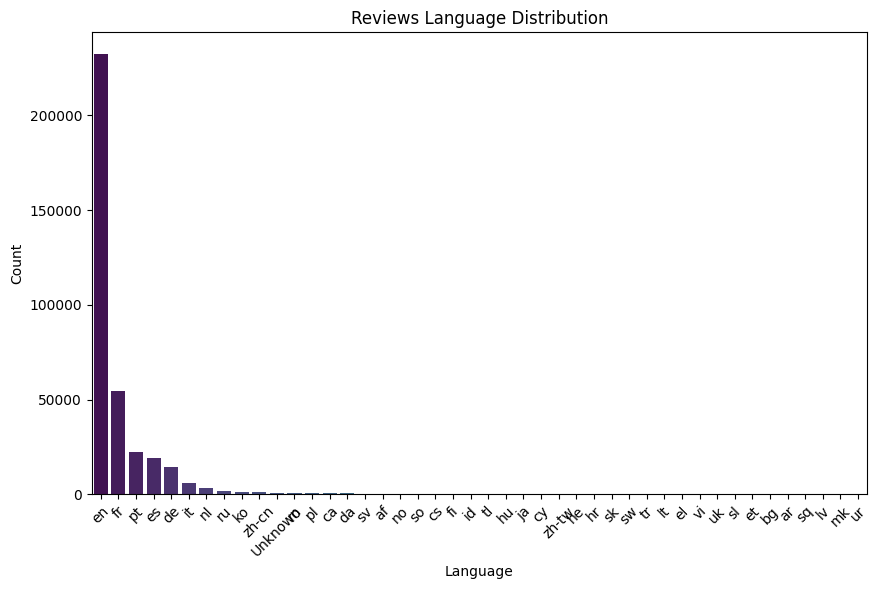

In [34]:
language_counts = train_merged["language_reviews"].value_counts()

# Sort the language counts
language_counts = language_counts.sort_values(ascending=False)

# Plot the sorted language counts
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Reviews Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [35]:
train_merged["language_reviews"].unique()

array(['en', 'cy', 'de', 'fr', 'es', 'pt', 'ru', 'it', 'nl', 'ko',
       'zh-cn', 'he', 'Unknown', 'id', 'pl', 'no', 'so', 'da', 'sq', 'ro',
       'ca', 'hr', 'ja', 'zh-tw', 'tl', 'cs', 'ar', 'af', 'sk', 'sv',
       'hu', 'el', 'sl', 'fi', 'et', 'sw', 'vi', 'uk', 'lt', 'tr', 'lv',
       'mk', 'bg', 'ur'], dtype=object)

**Languages Counts Description**

C:\Users\TCastilho\AppData\Local\Temp\ipykernel_3252\1052306786.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")


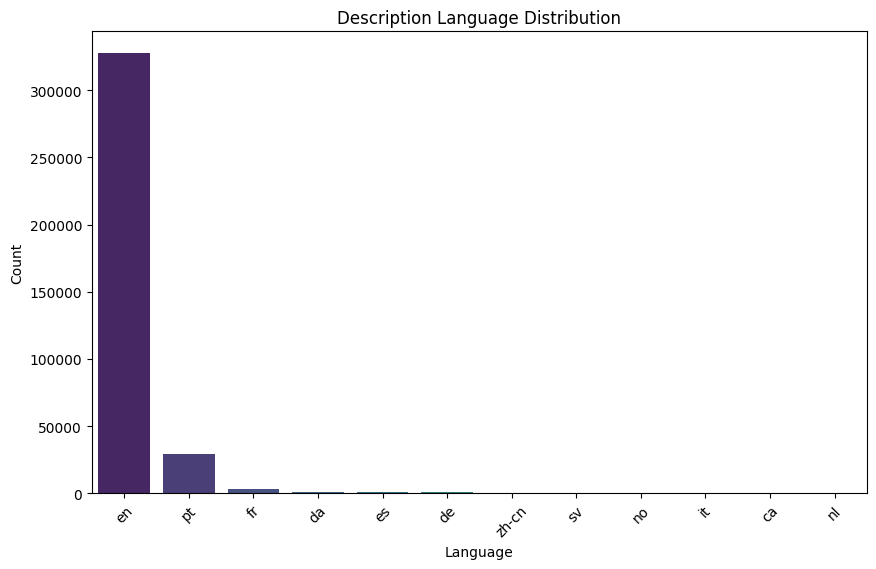

In [36]:
language_counts = train_merged["language_description"].value_counts()

# Sort the language counts
language_counts = language_counts.sort_values(ascending=False)

# Plot the sorted language counts
plt.figure(figsize=(10, 6))
sns.barplot(x=language_counts.index, y=language_counts.values, palette="viridis")
plt.title("Description Language Distribution")
plt.xlabel("Language")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [37]:
train_merged["language_description"].unique()

array(['en', 'pt', 'fr', 'es', 'de', 'da', 'no', 'sv', 'it', 'ca',
       'zh-cn', 'nl'], dtype=object)

**Listed vs Unlisted**

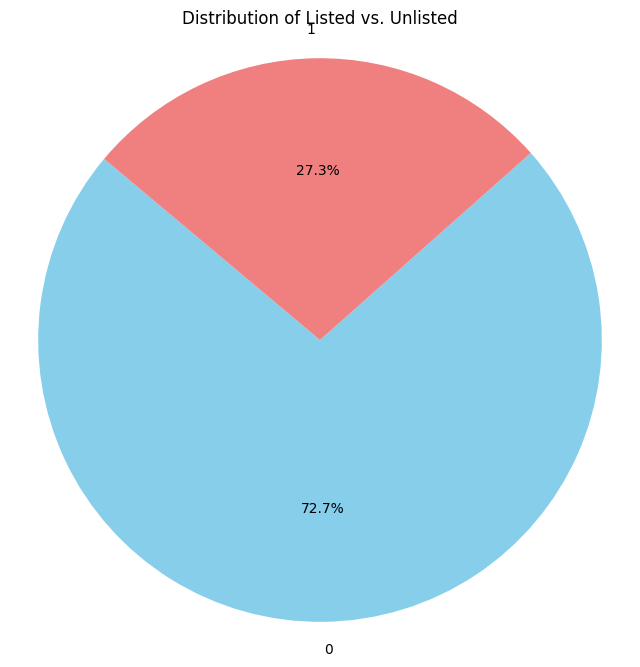

In [38]:
unlisted_counts = train['unlisted'].value_counts()

# Plotting the pie chart for the 'unlisted' column
plt.figure(figsize=(8, 8))
plt.pie(unlisted_counts, labels=unlisted_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Listed vs. Unlisted')
plt.axis('equal')  
plt.show()

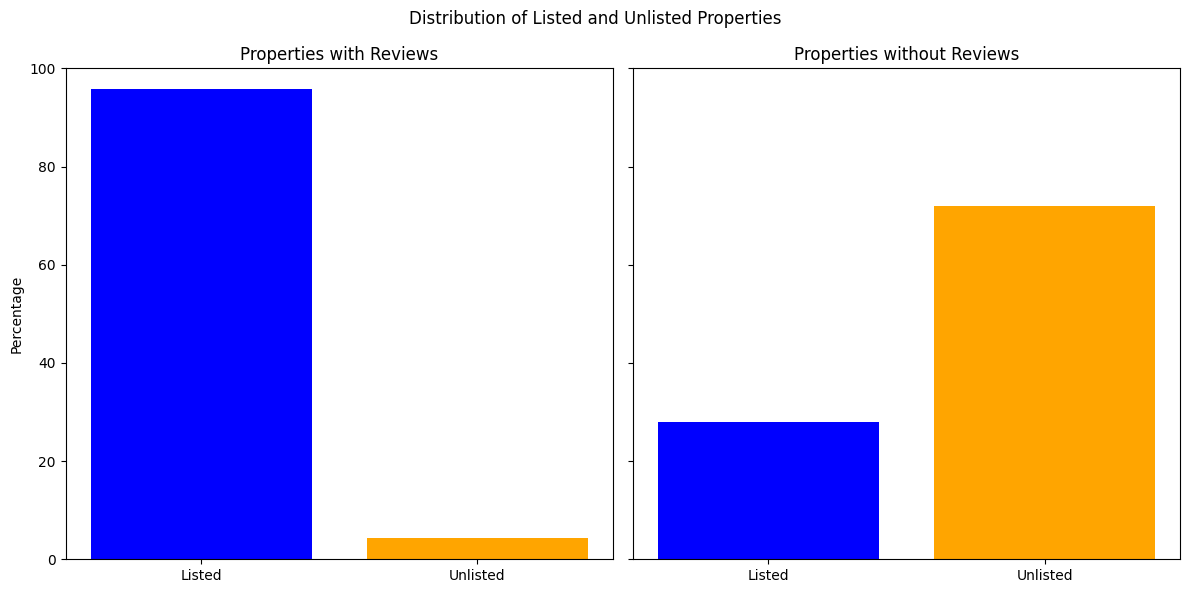

In [39]:
# Calculate the distribution of 'unlisted' for properties with reviews
with_reviews_indices = set(train_reviews['houseID'])
unlisted_with_reviews = train_merged[train_merged['houseID'].isin(with_reviews_indices)]['unlisted'].value_counts(normalize=True) * 100

# Calculate the distribution of 'unlisted' for properties without reviews
unlisted_without_reviews = train_merged[~train_merged['houseID'].isin(with_reviews_indices)]['unlisted'].value_counts(normalize=True) * 100

labels = ['Listed', 'Unlisted']
with_reviews = [unlisted_with_reviews.get(0, 0), unlisted_with_reviews.get(1, 0)]
without_reviews = [unlisted_without_reviews.get(0, 0), unlisted_without_reviews.get(1, 0)]

x = range(len(labels))

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot for properties with reviews
ax[0].bar(x, with_reviews, color=['blue', 'orange'])
ax[0].set_title('Properties with Reviews')
ax[0].set_xticks(x)
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('Percentage')
ax[0].set_ylim(0, 100)

# Plot for properties without reviews
ax[1].bar(x, without_reviews, color=['blue', 'orange'])
ax[1].set_title('Properties without Reviews')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].set_ylim(0, 100)

# Add overall title
fig.suptitle('Distribution of Listed and Unlisted Properties')

# Show the plot
plt.tight_layout()
plt.show()

**Word count**

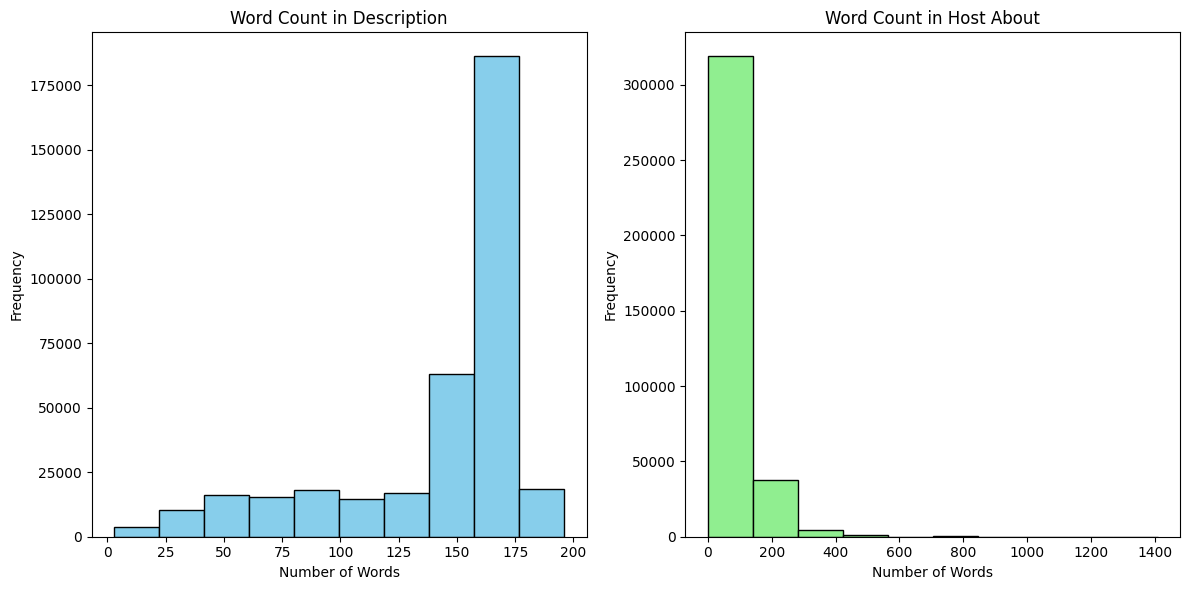

In [40]:
def count_words(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return np.nan  # or any other appropriate value for missing data

# Apply word count function to each column
train_merged['description_word_count'] = train_merged['description'].apply(count_words)
train_merged['host_about_word_count'] = train_merged['host_about'].apply(count_words)

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for description word count
plt.subplot(1, 2, 1)
plt.hist(train_merged['description_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Description')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for host_about word count
plt.subplot(1, 2, 2)
plt.hist(train_merged['host_about_word_count'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Word Count in Host About')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Word Frequencies**

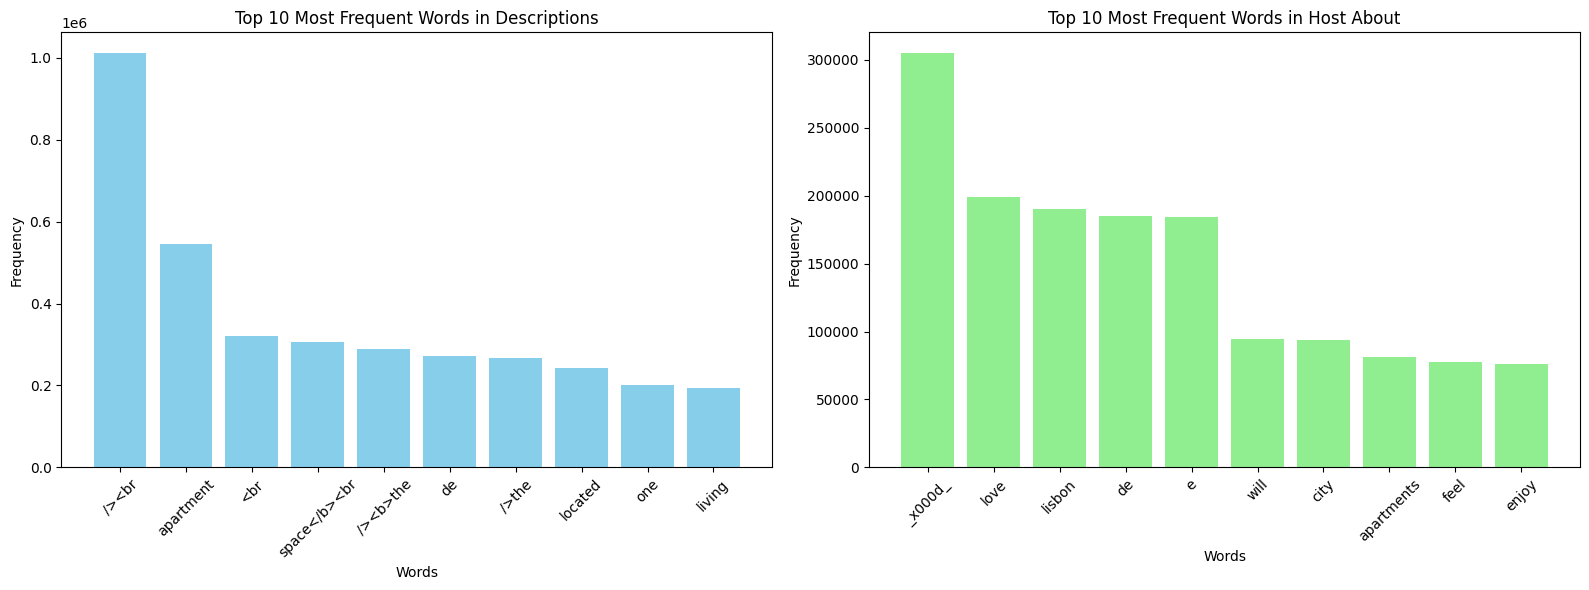

In [41]:
def count_word_frequencies(text_column, num_words=10):
    # Convert non-string values to strings
    text_column = [str(item) for item in text_column]
    
    # Join all text from the specified column into a single string
    all_text = ' '.join(text_column)

    # Convert text to lowercase and split into words
    words = all_text.lower().split()

    # Filter out common stop words (assuming STOPWORDS is defined somewhere)
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)
    
# Count word frequencies from the 'description' and 'host_about' columns
top_words_description = count_word_frequencies(train_merged['description'])
top_words_host_about = count_word_frequencies(train_merged['host_about'])

# Plotting the histograms of most frequent words for both columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 'description' column
axes[0].bar(top_words_description.keys(), top_words_description.values(), color='skyblue')
axes[0].set_title('Top 10 Most Frequent Words in Descriptions')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot for 'host_about' column
axes[1].bar(top_words_host_about.keys(), top_words_host_about.values(), color='lightgreen')
axes[1].set_title('Top 10 Most Frequent Words in Host About')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display plots
plt.tight_layout()
plt.show()


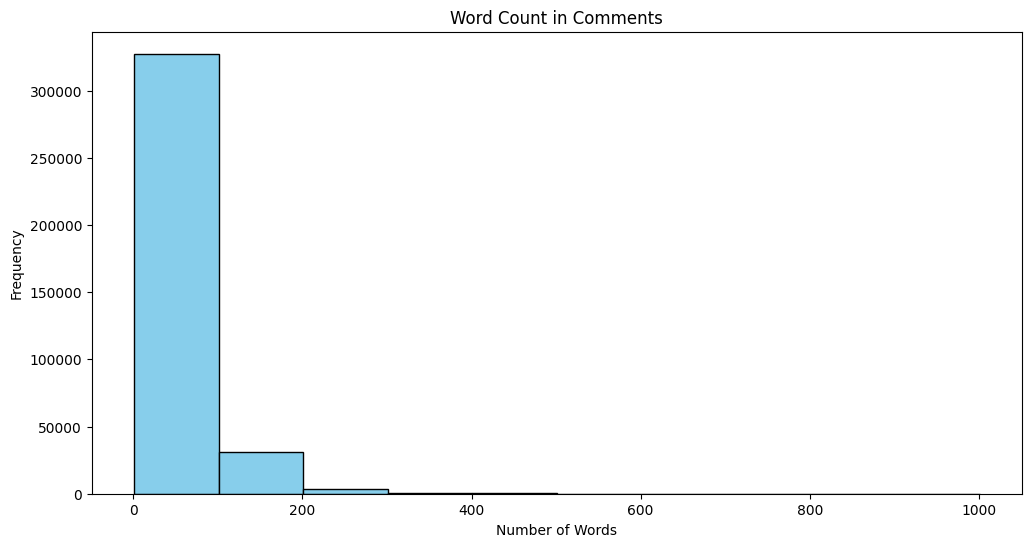

In [42]:
def count_words(text):
    # Convert text to string if it is not and handle NaN values
    if pd.isna(text):
        return 0
    return len(str(text).split())

# Apply word count function to the 'comments' column
word_counts = train_merged['comments'].apply(count_words)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(word_counts, bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Comments')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

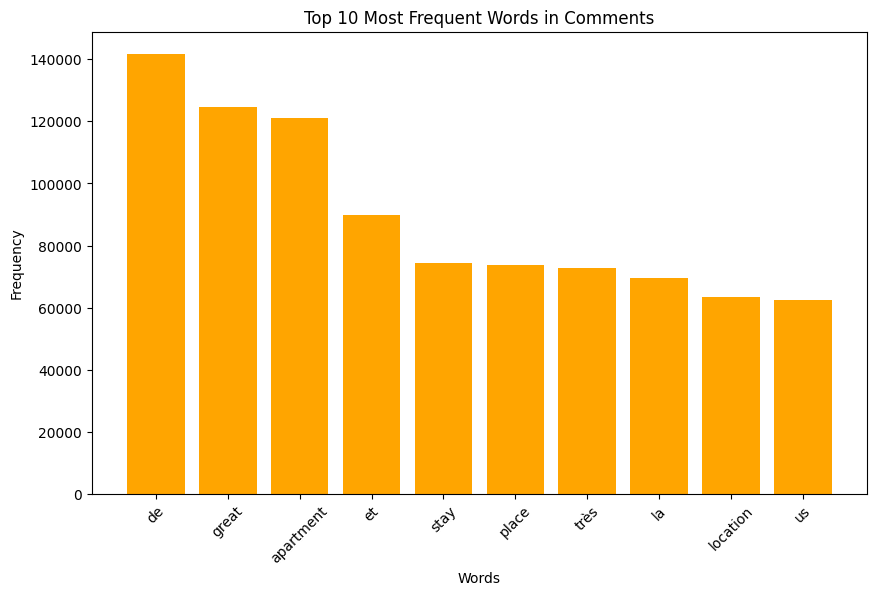

In [43]:
def count_word_frequencies(text_column, num_words=10):
    # Convert each comment to a string and concatenate them into a single text
    words = ' '.join(str(comment) for comment in text_column if pd.notna(comment)).lower().split()

    # Filter out common stop words
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)

# Count word frequencies from the 'comments' column
top_words_comments = count_word_frequencies(train_merged['comments'])

# Plotting the histogram of most frequent words in 'comments' column
plt.figure(figsize=(10, 6))
plt.bar(top_words_comments.keys(), top_words_comments.values(), color='orange')
plt.title('Top 10 Most Frequent Words in Comments')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**Word Cloud**

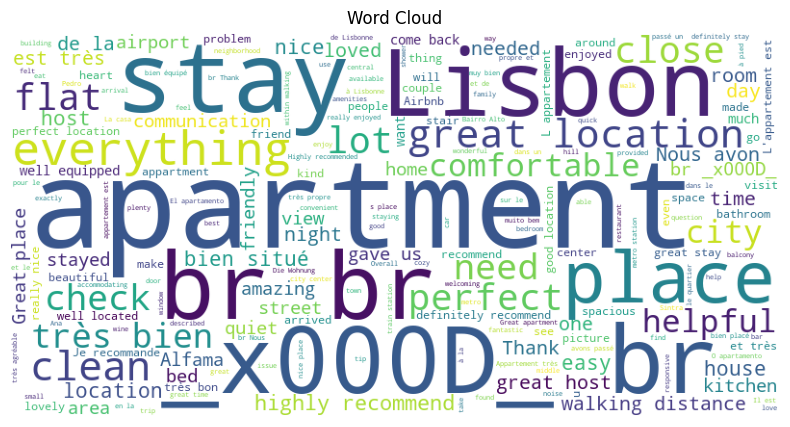

In [44]:
# Joining all the reviews into a single string
all_reviews = ' '.join(train_merged['comments'])
    
# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.title('Word Cloud')
plt.show()


## 3. Pre-Process

### 3.1 Emoji Treatment

The demojize() function takes a string as input and returns the string with the Unicode characters replaced by their corresponding emoji names. For example, if you pass the string “😀” to the demojize() function, it will return the string “smiley face”. https://codeforgeek.com/python-emoji-module/ emoji for python By default, the language is English (language='en') but also supported languages are:

Spanish ('es')

Portuguese ('pt')

Italian ('it')

French ('fr')

German ('de')

Farsi/Persian ('fa')

Indonesian ('id')

Simplified Chinese ('zh')

Japanese ('ja')

Korean ('ko')

Russian ('ru')

Arabic ('ar')

Turkish ('tr')

In [45]:
# Function to check for emojis
def has_emojis(text):
    if pd.isnull(text):
        return False
    return emoji.emoji_count(str(text)) > 0

# Function to convert emojis to text
def convert_emojis_to_text(dataframe, column_text, column_language):
    dataframe_copy = dataframe.copy()

    def convert_text(text, language):
        if has_emojis(text):
            try:
                return emoji.demojize(text, language=language)
            except:
                return emoji.demojize(text, language='en')
        else:
            return text

    # Apply the conversion to each row
    dataframe_copy[column_text] = dataframe_copy.apply(
        lambda row: convert_text(row[column_text], row[column_language]), axis=1
    )
    
    return dataframe_copy

In [46]:
train_merged_demojized = convert_emojis_to_text(train_merged, 'comments', 'language_reviews')

In [47]:
train_merged_demojized = convert_emojis_to_text(train_merged_demojized, 'description', 'language_description')

In [48]:
test_merged_demojized = convert_emojis_to_text(test_merged, 'comments', 'language_reviews')

In [49]:
test_merged_demojized = convert_emojis_to_text(test_merged_demojized, 'description', 'language_description')

**Checking if there still are emojis**

In [50]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

In [51]:
print_comments_with_emojis(train_merged_demojized, 'comments')

Comments with emojis after processing:
Index 437: 👍
Index 831: 👍
Index 1044: Wspaniałe miejsce! <br/><br/>Gospodarz, który nas obsługiwał był niezwykle uprzejmy i pomocny. Gdy potrzebowaliśmy pomocy w nocy od razu się z nami skontaktował i pomógł nam natychmiast. Mieszkanie jest nowe, czyste, schludne, a okolica urokliwa i autentyczna. Do Lizbony centralnej jest dosłownie 30 minut spacerem. Jeśli planujesz urlop w Lizbonie, koniecznie rozważ tę ofertę, bo odpoczniesz i poczujesz się zaopiekowany. <br/><br/>Dziękujemy jeszcze raz za gościnę! 🥰
Index 2384: Good👌
Index 3135: Amazing 10/10😇
Index 5307: ♥️
Index 6093: 💚
Index 6176: 👍
Index 7105: Bardzo komfortowe mieszkanie . Ładne pokoje , komfortowe łazienki . Zlokalizowane  w cichej okolicy , blisko sklepiki lokalne .<br/>Bezproblemowe zameldowanie.  Do  centrum  kilka kroków, kilka schodków i jesteś na placu Rossio i na placu Martim Monitz  z którego rusza  słynny tramwaj 28!! Niedaleko Elevador da Lavra który  pomoże  zmęczonym dostać 

In [52]:
print_comments_with_emojis(train_merged_demojized, 'description')

Comments with emojis after processing:
Index 176670: 这是位于葡萄牙里斯本辛特拉的独栋私人别墅，位于著名度假胜地辛特拉高尔夫酒店的正对面，拥有里斯本最大的球场，5分钟即可到达沙滩🏖️<br /><br /><b>License number</b><br />Exempt


We still have a very small percentage of emojis remaining after running the conversion function, it might be due to several factors such as unsupported emojis, non-standard emoji representations, or limitations in the emoji library. In our to prevent data leakage our decisions will be based on training data, and the test data is processed using the same rules established from the training data.

Based on the training set, we created a dictionary mapping emojis to their textual representations. Any emoji not found in the custom dictionary will be replaced with a generic placeholder :emoji:

textual representations can be found here: https://www.w3schools.com/charsets/ref_emoji_smileys.asp

https://www.geeksforgeeks.org/convert-emoji-into-text-in-python/

In [53]:
remaining_emoji_dict = {
    '💥': ':collision:',
    '🤭': ':face_with_hand_over_mouth:',
    '☺️': ':white_smiling_face:',
    '🤩': ':star-struck:',
    '💪🏽': ':flexed_biceps_dark_skin_tone:',
    '👍': ':thumbs_up:',
    '⭐': ':star:',
    '😊': ':smiling_face_with_smiling_eyes:',
    '👌': ':ok_hand:',
    '👌🏼': ':ok_hand::light_skin_tone:',
    '👍🏻': ':thumbs_up_light_skin_tone:',
    '👍🏽': ':thumbs_up_medium-dark_skin_tone:',
    '😘': ':face_blowing_a_kiss:',
    '🤗': ':hugging_face:',
    '😉': ':winking_face:',
    '🌟': ':glowing_star:',
    '🙂': ':slightly_smiling_face:',
    '😱': ':face_screaming_in_fear:',
    '😃': ':grinning_face_with_big_eyes:',
    '❤️': ':heart:',
    '🥰': ':smiling_face_with_hearts:',
    '😇':'smiling_face_with_halo:',
    '🤙🏼': ":call_me_hand_medium-light_skin_tone:",
    '🤙': ":call_me_hand:",
    '👏': ':clapping_hands:',
    '👏🏼': ':clapping_hands::light_skin_tone:',
    '💚': ':green_heart:',
    '🙂': ':slightly_smiling_face:',
    '🔝': ':top_arrow:',
    '👌🏽': ':ok_hand::medium_skin_tone:',
    '😁': ':beaming_face_with_smiling_eyes:',
    '😂': ':face_with_tears_of_joy:',
    '🇵🇹': ':flag_Portugal:',
    '😍': ':smiling_face_with_heart-eyes:',
    '✨': ':sparkles:',
    '🙏🏻': ':folded_hands::light_skin_tone:',
    '⭐': ':star:',
    '😏': ':smirking_face:',
    '😋': ':face_savoring_food:',
    '🐝': ':honeybee:',
    '😎': ':smiling_face_with_sunglasses:',
    '💯': ':hundred_points:',
    '🎇': ':sparkler:',
    '🖤': ':black_heart:',
    '😌': ':relieved_face:',
    '🐈': ':cat:',
    '🎈': ':balons:',
    '💕': ':two_hearts:',
    '🚀': ':rocket:',
    '🌞': ':sun_with_face:',
    '🍋': ':lemon:',
    '😜':':stuck_out_tongue_winking_eye:',
    '🪨': ':rock:',
    '✌️': ':victory_hand:',
    '🔑': ':key:',
    '😃': ':grinning_face_with_big_eyes:',
    '😀':':grinning_face:',
    '✔️':':check_mark:',
    '🉐':':Japanese_acceptable_button:',
    '🤪':':zany_face:',
    '😆': ':grinning_squinting_face:',
    '🌅': ':sunrise:',
    '🌸': ':cherry_blossom:',
    '🦫': ':beaver:',
    '🎷': ':saxophone:',
    '🔥':':fire:',
    '🐐':':goat:',
    '🤝':':handshake:',
    '☹️':':frowning_face:',
    '☀️':':sun:',
    '🌱': ':seedling:',
    '✅': ':white_heavy_check_mark:',
    '🌹': ':rose:',
    '🙈': ':see-no-evil_monkey:',
    '💗': ':growing_heart:',
    '🏖️': ':beach:',
    '👌🏾': ':ok_hand::medium-dark_skin_tone:',
    '♥️': ':heart_suit:',
    '❤️': ':red_heart:',
    '🙌🏻':':raising_hands::light_skin_tone:',
    '🙌🏾':':raising_hands::medium-dark_skin_tone:',
    '☔':':umbrella_with_rain_drops:',
    '🇧🇪':':flag_Belgium:',
    '👎🏽':':thumbs_down::medium_skin_tone:',
    '👍🏼':':thumbs_up::medium-light_skin_tone:',
    '🤨':':face_with_raised_eyebrow:',
    '😭':':loudly_crying_face:',
    '👍🏾':':thumbs_up::medium-dark_skin_tone:',
    '🤟🏻':':love-you_gesture::light_skin_tone:',
    '🙁':':slightly_frowning_face:',
    '🤣':':rolling_on_the_floor_laughing:',
    '👌🏿':':ok_hand::dark_skin_tone:',
    '🇩🇰':':flag_Denmark:',
    '❣️':':heavy_heart_exclamation_mark_ornament:',   
}


In [54]:
# Define a function to check if a text contains any emojis
def has_emojis(text):
    return any(emoji.is_emoji(char) for char in text)

# Define a function to replace the remaining emojis using a custom dictionary
def custom_replace_remaining_emojis(text, emoji_dict):
    for emj, desc in emoji_dict.items():
        text = text.replace(emj, desc)
    return text

# Define a function to replace any unknown emojis with a placeholder
def replace_unknown_emojis(text):
    return emoji.replace_emoji(text, replace=":emoji:")

# Define a function to process remaining emojis in the dataframe
def process_remaining_emojis(dataframe, column_text, emoji_dict):
    dataframe_copy = dataframe.copy()

    def convert_text_with_remaining_dict(text):
        if has_emojis(text):
            text = custom_replace_remaining_emojis(text, emoji_dict)
            text = replace_unknown_emojis(text)
            return text
        else:
            return text

    dataframe_copy[column_text] = dataframe_copy[column_text].apply(convert_text_with_remaining_dict)
    return dataframe_copy

In [55]:
train_merged_demojized = process_remaining_emojis(train_merged_demojized, 'comments', remaining_emoji_dict)

In [56]:
train_merged_demojized = process_remaining_emojis(train_merged_demojized, 'description', remaining_emoji_dict)

In [57]:
test_merged_demojized = process_remaining_emojis(test_merged_demojized, 'comments', remaining_emoji_dict)

In [58]:
test_merged_demojized = process_remaining_emojis(test_merged_demojized, 'description', remaining_emoji_dict)

In [59]:
def print_comments_with_emojis(dataframe, column_text):
    with_emojis = dataframe[dataframe[column_text].apply(has_emojis)]
    print("Comments with emojis after processing:")
    for index, row in with_emojis.iterrows():
        print(f"Index {index}: {row[column_text]}")

print_comments_with_emojis(train_merged_demojized, 'comments')
print_comments_with_emojis(train_merged_demojized, 'description')

Comments with emojis after processing:
Comments with emojis after processing:


### 3.2.1 Language Problem 

In [60]:
language_counts = (train_merged_demojized["language_description"].value_counts())


total_entries = len(train_merged_demojized)
language_percentages = (language_counts / total_entries) * 100

print("\nLanguage description Percentages:")
print(language_percentages)


Language description Percentages:
language_description
en       90.149804
pt        8.064934
fr        0.882029
da        0.381946
es        0.263535
de        0.233243
zh-cn     0.017624
sv        0.003029
no        0.001377
it        0.001102
ca        0.000826
nl        0.000551
Name: count, dtype: float64


In [61]:
language_counts = (train_merged_demojized["language_reviews"].value_counts())


total_entries = len(train_merged_demojized)
language_percentages = (language_counts / total_entries) * 100

print("\nLanguage description Percentages:")
print(language_percentages)


Language description Percentages:
language_reviews
en         63.962108
fr         15.088946
pt          6.177507
es          5.298232
de          3.916121
it          1.691359
nl          0.984744
ru          0.412513
ko          0.403150
zh-cn       0.286666
Unknown     0.240128
ro          0.225533
pl          0.164675
ca          0.159443
da          0.126948
sv          0.102715
af          0.091700
no          0.082613
so          0.076279
cs          0.057554
fi          0.055351
id          0.044886
tl          0.042133
hu          0.038553
ja          0.030016
cy          0.029741
zh-tw       0.025059
he          0.025059
hr          0.020929
sk          0.019276
sw          0.019001
tr          0.017073
lt          0.016798
el          0.013493
vi          0.012667
uk          0.012117
sl          0.010464
et          0.005783
bg          0.004957
ar          0.002478
sq          0.002203
lv          0.002203
mk          0.000551
ur          0.000275
Name: count, dtype: floa

- The Descriptions of the Airbnb listings are mainly **99%** written either in English or Portuguese.
- The Reviews are written in many languages, but we will consider those that work properly with Spacy:
  - en : English
  - fr : French
  - pt : Portuguese
  - es : Spanish
  - de : German
  - it : Italian
  - nl : Dutch
  - sv : Swedish
  - fi : Finnish
  - da : Danish
  - ro : Romanian
  - no : Norwegian

**Dropping the other rows**

In [62]:
# Get the initial number of rows
initial_row_count = len(train_merged_demojized)

# Define the values to keep
valid_languages = ['en', 'pt', 'fr', 'es', 'de', 'it', 'nl','sv','fi','da','ro','no']


In [63]:
# Filter the DataFrame
train_merged_demojized = train_merged_demojized[train_merged_demojized['language_description'].isin(valid_languages)]

# Get the number of rows after filtering
filtered_row_count = len(train_merged_demojized)

# Calculate the percentage of rows dropped
rows_dropped = initial_row_count - filtered_row_count
percentage_dropped = (rows_dropped / initial_row_count) * 100

# Display the filtered DataFrame and the percentage of rows dropped
print("Filtered DataFrame:")
print(f"\nPercentage of rows dropped: {percentage_dropped:.2f}%")


Filtered DataFrame:

Percentage of rows dropped: 0.02%


In [64]:
# Filter the DataFrame
train_merged_demojized = train_merged_demojized[train_merged_demojized['language_reviews'].isin(valid_languages)]

# Get the number of rows after filtering
filtered_row_count = len(train_merged_demojized)

# Calculate the percentage of rows dropped
rows_dropped = initial_row_count - filtered_row_count
percentage_dropped = (rows_dropped / initial_row_count) * 100

# Display the filtered DataFrame and the percentage of rows dropped
print("Filtered DataFrame:")
print(f"\nPercentage of rows dropped: {percentage_dropped:.2f}%")


Filtered DataFrame:

Percentage of rows dropped: 2.31%


In [65]:
number_of_updated_houseIDs = train_merged_demojized['houseID'].nunique()
print("Number of original houseIDs:", number_of_original_houseIDs)
print("Number of updated houseIDs:", number_of_updated_houseIDs)

Number of original houseIDs: 6248
Number of updated houseIDs: 6238


In [66]:
# Export the dataset to a CSV file
train_merged_demojized.to_csv('train_merged_demojized.csv', index=True)
test_merged_demojized.to_csv('test_merged_demojized.csv', index=True)

In [67]:
#load the CSVs
train_merged_demojized = pd.read_csv("train_merged_demojized.csv", index_col='reviewID')
test_merged_demojized = pd.read_csv("test_merged_demojized.csv", index_col='reviewID')

### 3.2.2 Translating rows to english

We attempted to translate all the rows that weren't in English, but encountered too many bugs and errors in the process. Additionally, this task was very time-consuming, so we concluded that it probably wasn't a good idea.

### 3.3 Cleaning Data

In [68]:
# Load SpaCy models
nltk_lemmatizer = WordNetLemmatizer()

spacy_lemmatizers = {
    'en': spacy.load('en_core_web_sm'),
    'fr': spacy.load('fr_core_news_sm'),
    'pt': spacy.load('pt_core_news_sm'),
    'es': spacy.load('es_core_news_sm'),
    'de': spacy.load('de_core_news_sm'),
    'it': spacy.load('it_core_news_sm'),
    'nl': spacy.load('nl_core_news_sm'),
    'sv': spacy.load('sv_core_news_sm'),
    'fi': spacy.load('fi_core_news_sm'),
    'da': spacy.load('da_core_news_sm'),
    'ro': spacy.load('ro_core_news_sm'),
    'no': spacy.load('nb_core_news_sm'),
    'xx': spacy.load('xx_ent_wiki_sm')
}

# Define stopwords for all languages
stopwords_dict = {
    'en': set(stopwords.words('english')),
    'fr': set(stopwords.words('french')),
    'de': set(stopwords.words('german')),
    'es': set(stopwords.words('spanish')),
    'pt': set(stopwords.words('portuguese')),
    'it': set(stopwords.words('italian')),
    'nl': set(stopwords.words('dutch')),
    'sv': set(stopwords.words('swedish')),
    'fi': set(stopwords.words('finnish')),
    'da': set(stopwords.words('danish')),
    'ro': set(stopwords.words('romanian')),
    'no': set(stopwords.words('norwegian'))
}

# Define stemmers for all languages
stemmers_dict = {
    'en': SnowballStemmer('english'),
    'fr': SnowballStemmer('french'),
    'pt': SnowballStemmer('portuguese'),
    'es': SnowballStemmer('spanish'),
    'de': SnowballStemmer('german'),
    'it': SnowballStemmer('italian'),
    'nl': SnowballStemmer('dutch'),
    'sv': SnowballStemmer('swedish'),
    'fi': SnowballStemmer('finnish'),
    'da': SnowballStemmer('danish'),
    'ro': SnowballStemmer('romanian'),
    'no': SnowballStemmer('norwegian')
}

# Define accent mapping dictionary
accent_mapping = {
    'à': 'a', 'á': 'a', 'â': 'a', 'ã': 'a', 'ä': 'a', 'å': 'a', 'æ': 'ae', 'ā': 'a',
    'è': 'e', 'é': 'e', 'ê': 'e', 'ë': 'e', 'ē': 'e',
    'ì': 'i', 'í': 'i', 'î': 'i', 'ï': 'i',
    'ò': 'o', 'ó': 'o', 'ô': 'o', 'õ': 'o', 'ö': 'o', 'ø': 'o', 'œ': 'oe',
    'ù': 'u', 'ú': 'u', 'û': 'u', 'ü': 'u', 'ū': 'u', 'ů': 'u',
    'ç': 'c',
    'ñ': 'n',
    'ś': 's', 'š': 's', 'ß': 'ss',
    'ź': 'z', 'ż': 'z', 'ž': 'z'
}

# Function to remove accents
def remove_accents(text):
    modified_text = ""
    for char in text:
        if char in accent_mapping:
            modified_text += accent_mapping[char]
        else:
            modified_text += char
    return modified_text

# Function to remove stopwords
def remove_stopwords(text, lang):
    stopwords_set = stopwords_dict.get(lang, set())
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_set]
    return ' '.join(filtered_words)

# Function to clean text
def clean_text(text, lang, lemmatize=True, stem=False):

    # Remove accents
    text = remove_accents(text)

    # Lowercase text
    text = text.lower()

    # Remove unnecessary tags and all non-alphabetic characters except '#' and specified HTML tags
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub("<br />", " ", text)

    # Remove standalone occurrences of 'br' and 'b' while preserving them in words
    text = re.sub(r'\b(br|b)\b', ' ', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', ' ', text)

    # Replace numbers with #NUMBER while preserving #
    #text = re.sub(r'(?<!#)\b\d+\b(?!#)', '#NUMBER', text)

    # Remove numbers and #
    text = re.sub(r'\d+', ' ', text)  # Remove numbers
    text = text.replace('#', ' ')  # Remove '#'

    # Remove non-alphabetic characters 
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)

    # Remove punctuation
    text = ''.join([char if char not in string.punctuation else ' ' for char in text])   

    # Remove stopwords
    text = remove_stopwords(text, lang)
    
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize text
    tokens = text.split()
    
    # Lemmatize before stopwords removal
    if lemmatize:
        if lang == 'en':
            tokens = [nltk_lemmatizer.lemmatize(word) for word in tokens]
        elif lang in spacy_lemmatizers:
            doc = spacy_lemmatizers[lang](text)
            tokens = [token.lemma_ for token in doc]
        else:
            doc = spacy_lemmatizers['xx'](text)  # Multilingual model
            tokens = [token.lemma_ for token in doc]
    
    # Stem before stopwords removal
    if stem and lang in stemmers_dict:
        stemmer = stemmers_dict[lang]
        tokens = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(tokens)

**Test function**

In [69]:
clean_text("#nocomment","fr")

'nocomment'

The # is removed but it will not be an issue.

In [70]:
# Testing the function with examples
examples = [
    ("Hello! This is a test <br> text with <b>HTML</b> tags, numbers like 123, and accented characters like é and ñ.", 'en'),  # English
    ("Bonjour! Ceci est un test de <br> texte avec des <b>balises HTML</b>, des nombres comme 123, et des caractères accentués comme é et ç.", 'fr'),  # French
    ("Olá! Este é um <br> texto de teste com <b>etiquetas HTML</b>, números como 123, e caracteres acentuados como é e õ.", 'pt'),  # Portuguese
    ("¡Hola! Este es un <br> texto de prueba con <b>etiquetas HTML</b>, números como 123, y caracteres acentuados como ñ y á.", 'es'),  # Spanish
    ("Hallo! Dies ist ein Test <br> Text mit <b>HTML</b> Tags, Zahlen wie 123, und akzentuierte Zeichen wie ä und ß.", 'de'),  # German
    ("Ciao! Questo è un <br> testo di prova con <b>tag HTML</b>, numeri come 123, e caratteri accentati come à e è.", 'it'),  # Italian
    ("Hallo! Dit is een <br> testtekst met <b>HTML</b> tags, nummers zoals 123, en geaccentueerde tekens zoals é en ö.", 'nl'),  # Dutch
    ("Hej! Detta är ett test <br> text med <b>HTML</b> taggar, nummer som 123, och accenterade tecken som é och ñ.", 'sv'),  # Swedish
    ("Hei! Tämä on testi <br> tekstiä, jossa on <b>HTML</b> -tagit, numeroita kuten 123 ja aksentteja kuten é ja ñ.", 'fi'),  # Finnish
    ("Hej! Dette er en test <br> tekst med <b>HTML</b> tags, tal som 123, og accenterede tegn som é og ñ.", 'da'),  # Danish
    ("Salut! Acesta este un test <br> de text cu etichete <b>HTML</b>, numere ca 123 și caractere accentuate ca é și ñ.", 'ro'),  # Romanian
    ("Hei! Dette er en test <br> tekst med <b>HTML</b> tags, tall som 123, og aksenterte tegn som é og ñ.", 'no')  # Norwegian
]

for text, lang in examples:
    cleaned_text = clean_text(text, lang)
    print(f"Original text: {text}")
    print(f"Cleaned text: {cleaned_text}\n")


Original text: Hello! This is a test <br> text with <b>HTML</b> tags, numbers like 123, and accented characters like é and ñ.
Cleaned text: hello test text html tag number like accented character like e n

Original text: Bonjour! Ceci est un test de <br> texte avec des <b>balises HTML</b>, des nombres comme 123, et des caractères accentués comme é et ç.
Cleaned text: bonjour ceci test texte balise html nombre comme caractere accentue comme e

Original text: Olá! Este é um <br> texto de teste com <b>etiquetas HTML</b>, números como 123, e caracteres acentuados como é e õ.
Cleaned text: olar texto testar etiqueta html numero caracter acentuar

Original text: ¡Hola! Este es un <br> texto de prueba con <b>etiquetas HTML</b>, números como 123, y caracteres acentuados como ñ y á.
Cleaned text: holar texto probar etiqueta html numero caracter acentuado n

Original text: Hallo! Dies ist ein Test <br> Text mit <b>HTML</b> Tags, Zahlen wie 123, und akzentuierte Zeichen wie ä und ß.
Cleaned text:

In [71]:
texto = clean_text("isto é um teste e é suposto retirar palavras","pt",lemmatize=True,stem=False)
print(texto)

teste suposto retirar palavra


In [72]:
test_examples = [
    ("Je veux avoir le livre de la bibliothèque.", 'fr'),  # French
    ("Et si nous allions au cinéma ce soir ?", 'fr'),      # French
    ("Elle a besoin d'avoir des amis pour être heureuse.", 'fr'),  # French
    ("Le chat dort sur le canapé.", 'fr'),                # French
    ("O gato está em cima do telhado.", 'pt'),            # Portuguese
    ("Ele e ela foram à praia juntos.", 'pt'),            # Portuguese
    ("Eu vou comprar o livro que você recomendou.", 'pt'), # Portuguese
    ("O carro e a bicicleta estão na garagem.", 'pt')     # Portuguese
]

for text, lang in test_examples:
    cleaned_text = clean_text(text, lang)
    print(f"Original text: {text}")
    print(f"Cleaned text: {cleaned_text}\n")

Original text: Je veux avoir le livre de la bibliothèque.
Cleaned text: veux avoir livre bibliothequ

Original text: Et si nous allions au cinéma ce soir ?
Cleaned text: si allion cinemer soir

Original text: Elle a besoin d'avoir des amis pour être heureuse.
Cleaned text: avoir besoin avoir ami etre heureux

Original text: Le chat dort sur le canapé.
Cleaned text: chat dort canape

Original text: O gato está em cima do telhado.
Cleaned text: gato cima telhar

Original text: Ele e ela foram à praia juntos.
Cleaned text: praia junto

Original text: Eu vou comprar o livro que você recomendou.
Cleaned text: ir comprar livro voce recomendar

Original text: O carro e a bicicleta estão na garagem.
Cleaned text: carro bicicleta estao garagem



In [73]:
# Assuming train_merged is your DataFrame
total_rows = len(train_merged_demojized)
with tqdm(total=total_rows) as pbar:
    # Apply clean_text with progress bar to each row
    def apply_and_track_progress(row):
        pbar.update(1)
        return clean_text(row['comments'], row['language_reviews'])
        
    train_merged_demojized['cleaned_comments'] = train_merged_demojized.apply(apply_and_track_progress, axis=1)
    test_merged_demojized['cleaned_comments'] = test_merged_demojized.apply(apply_and_track_progress, axis=1)

396838it [16:04, 411.40it/s]                                                                                           


In [74]:
train_merged_demojized[['comments', 'language_reviews', 'cleaned_comments']].head(5)

,comments,language_reviews,cleaned_comments
reviewID,,,
0,this is a very cozy and comfortable house to s...,en,cozy comfortable house stay never worry safety...
2,"My first hostel experience, and all I have to ...",en,first hostel experience say pretty hard beat p...
3,Das Hostel war neu und deshalb funktionierte a...,de,hostel neu deshalb funktionieren tadellos schn...
4,"It was fine for a dorm, but I think for the pe...",en,fine dorm think people staying far le bathroom...
5,Our stay in Lisbon Tip Hostel was very good. T...,en,stay lisbon tip hostel good mixed room well cl...


In [75]:
# Assuming train_merged is your DataFrame
total_rows = len(train_merged_demojized)
with tqdm(total=total_rows) as pbar:
    # Apply clean_text with progress bar to each row
    def apply_and_track_progress(row):
        pbar.update(1)
        return clean_text(row['description'], row['language_description'])
        
    train_merged_demojized['cleaned_description'] = train_merged_demojized.apply(apply_and_track_progress, axis=1)
    test_merged_demojized['cleaned_description'] = test_merged_demojized.apply(apply_and_track_progress, axis=1)

396838it [09:54, 667.87it/s]                                                                                           


In [76]:
train_merged_demojized[['description', 'language_description', 'cleaned_description']].head(50)

,description,language_description,cleaned_description
reviewID,,,
0,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
2,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
3,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
4,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
5,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
6,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
7,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
8,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...
9,"This is a shared mixed room in our hostel, wit...",en,shared mixed room hostel shared bathroom locat...


In [77]:
# Export the dataset to a CSV file
train_merged_cleaned=train_merged_demojized
train_merged_cleaned.to_csv('train_merged_cleaned.csv', index=True)
test_merged_cleaned=test_merged_demojized
test_merged_cleaned.to_csv('test_merged_cleaned.csv', index=True)

### 3.4 Removing Unnecessary Data

In [78]:
train_merged_cleaned = pd.read_csv("train_merged_cleaned.csv",index_col='reviewID')
test_merged_cleaned = pd.read_csv("test_merged_cleaned.csv",index_col='reviewID')

In [79]:
cleaned_train = train_merged_cleaned.drop(columns=['host_about', 'comments', 'description', 'language_reviews', 'language_description', 'description_word_count', 'host_about_word_count'])
cleaned_test = test_merged_cleaned.drop(columns=['host_about', 'comments', 'description', 'language_reviews', 'language_description'])

Before executing the split, we made the decision to merge all the comments relative to the same house into a new variable named all_comments_cleaned.

In [80]:
# Function to preprocess the DataFrame
def preprocess_comments(df):
    # Ensure that cleaned_comments are strings and handle NaN values
    df['cleaned_comments'] = df['cleaned_comments'].astype(str).fillna('')

    # Group by houseID and aggregate the comments
    grouped = df.groupby('houseID')['cleaned_comments'].apply(lambda x: ' '.join(x)).reset_index()

    # Rename the aggregated column to 'all_comments_cleaned'
    grouped.rename(columns={'cleaned_comments': 'all_comments_cleaned'}, inplace=True)

    # Merge the grouped data back with the original dataframe on houseID
    preprocessed_df = pd.merge(df.drop(columns='cleaned_comments'), grouped, on='houseID')

    # Drop duplicate rows since the merge might create duplicates
    preprocessed_df = preprocessed_df.drop_duplicates(subset='houseID').reset_index(drop=True)

    # Set houseID as the index
    preprocessed_df.set_index('houseID', inplace=True)
    
    return preprocessed_df

# Preprocess cleaned_train
train_preprocessed = preprocess_comments(cleaned_train)
# Preprocess cleaned_test
test_preprocessed = preprocess_comments(cleaned_test)

### 3.5 Re - Visualizations

**Word Count**

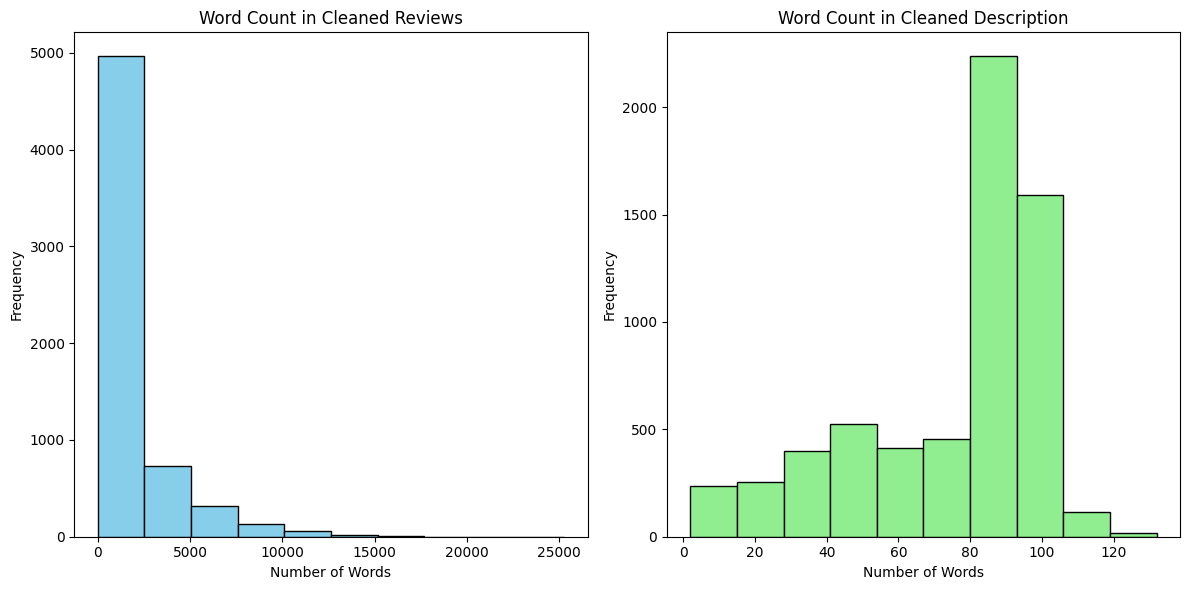

In [81]:
def count_words(text):
    if isinstance(text, str):
        return len(text.split())
    else:
        return np.nan  # or any other appropriate value for missing data

# Apply word count function to each column
train_preprocessed['cleaned_comments_word_count'] = train_preprocessed['all_comments_cleaned'].apply(count_words)
train_preprocessed['cleaned_description_word_count'] = train_preprocessed['cleaned_description'].apply(count_words)

# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for cleaned_comments_word_count
plt.subplot(1, 2, 1)
plt.hist(train_preprocessed['cleaned_comments_word_count'], bins=10, color='skyblue', edgecolor='black')
plt.title('Word Count in Cleaned Reviews')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for cleaned_description_word_count
plt.subplot(1, 2, 2)
plt.hist(train_preprocessed['cleaned_description_word_count'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Word Count in Cleaned Description')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Word Frequencies**

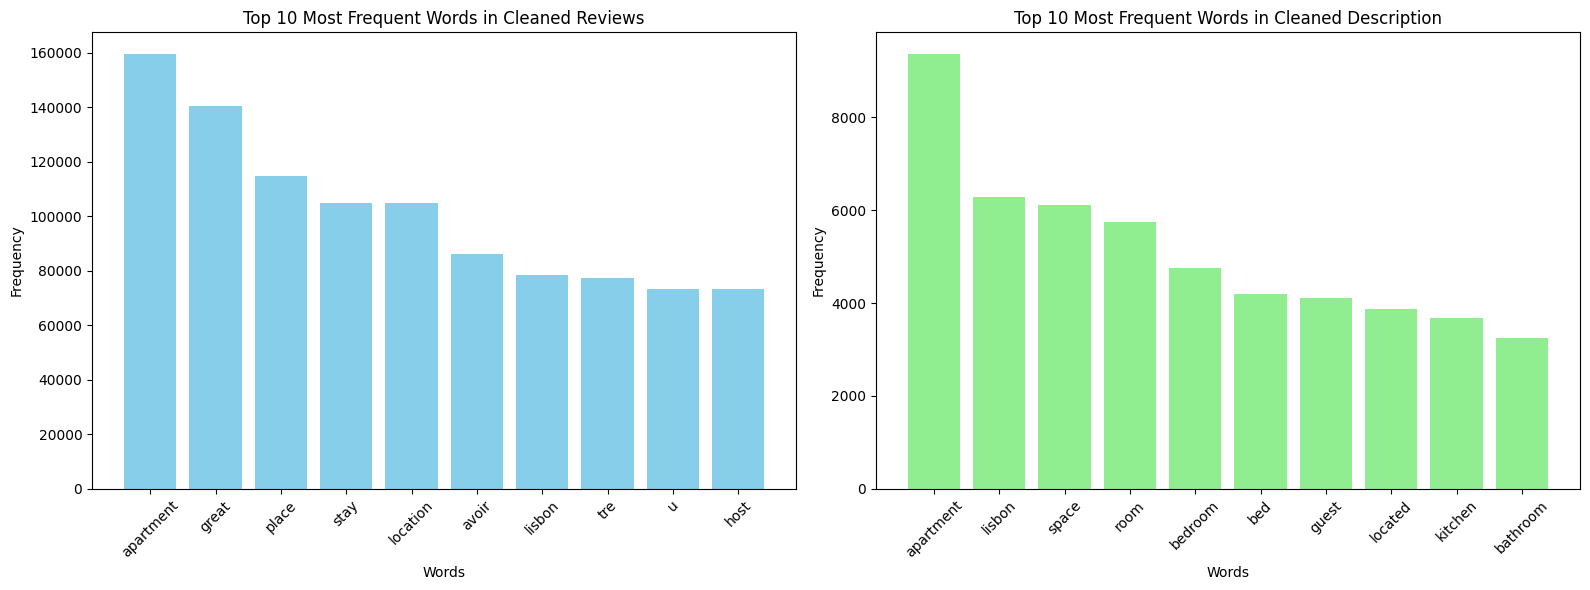

In [82]:
def count_word_frequencies(text_column, num_words=10):
    # Convert non-string values to strings
    text_column = [str(item) for item in text_column]
    
    # Join all text from the specified column into a single string
    all_text = ' '.join(text_column)

    # Convert text to lowercase and split into words
    words = all_text.lower().split()

    # Filter out common stop words (assuming STOPWORDS is defined somewhere)
    words = [word for word in words if word not in STOPWORDS]

    # Count word frequencies
    word_counts = Counter(words)

    # Get the most common words and their frequencies
    top_words = word_counts.most_common(num_words)

    return dict(top_words)

# Apply word count function to each column
top_words_cleaned_comments = count_word_frequencies(train_preprocessed['all_comments_cleaned'])
top_words_cleaned_description = count_word_frequencies(train_preprocessed['cleaned_description'])

# Plotting the histograms of most frequent words for both columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for 'cleaned_comments' column
axes[0].bar(top_words_cleaned_comments.keys(), top_words_cleaned_comments.values(), color='skyblue')
axes[0].set_title('Top 10 Most Frequent Words in Cleaned Reviews')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot for 'cleaned_description' column
axes[1].bar(top_words_cleaned_description.keys(), top_words_cleaned_description.values(), color='lightgreen')
axes[1].set_title('Top 10 Most Frequent Words in Cleaned Description')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Frequency')
axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout and display plots
plt.tight_layout()
plt.show()


**Word Cloud**

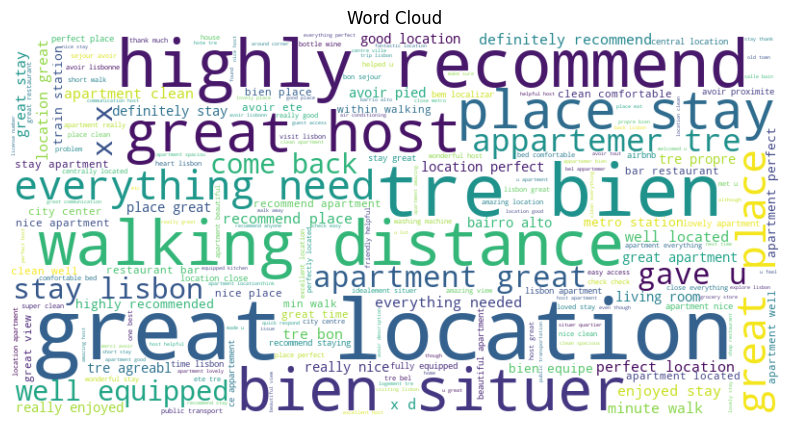

In [83]:
# Convert NaN values to empty strings and then join all the reviews and descriptions into a single string
comments = train_preprocessed['all_comments_cleaned'].fillna('').astype(str)
descriptions = train_preprocessed['cleaned_description'].fillna('').astype(str)
all_reviews_and_descriptions = ' '.join(comments) + ' ' + ' '.join(descriptions)

# Create WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews_and_descriptions)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud')
plt.show()


### 3.6 Train / Validation Split

In [84]:
# Sort the DataFrame by the index (houseID)
train_preprocessed_sorted = train_preprocessed.sort_index()

# Train-validation split for cleaned_train dataset with stratification
X_train, X_val, y_train, y_val = train_test_split(
    train_preprocessed_sorted[['all_comments_cleaned', 'cleaned_description']],
    train_preprocessed_sorted['unlisted'],  # Ensure this is a Series, not a DataFrame
    test_size=0.3,
    random_state=42,
    stratify=train_preprocessed_sorted['unlisted']  # Stratify by the target variable
)

# Test split for cleaned_test dataset
#X_test = cleaned_test[['cleaned_comments', 'cleaned_description', 'houseID']]
#y_test = cleaned_test[['unlisted', 'houseID']]

**Exporting the split to csv to make sure we always use the same split**

In [85]:
# Exporting datasets to CSV
X_train.to_csv("X_train.csv")
X_val.to_csv("X_val.csv")
#X_test.to_csv("X_test.csv")
y_train.to_csv("y_train.csv")
y_val.to_csv("y_val.csv")
#y_test.to_csv("y_test.csv")

## 4. Feature Engineering

In this process, we will create various datasets to test with different models later. The primary goal is to combine diverse dataset concepts with different models in hopes of finding a successful combination that performs well in the test split.

**Loading the previously done split**

In [2]:
# Load train-validation split datasets
X_train = pd.read_csv("X_train.csv", index_col=0)
X_val = pd.read_csv("X_val.csv", index_col=0)
#X_test = pd.read_csv("X_test.csv", index_col=0)
y_train = pd.read_csv("y_train.csv", index_col=0)
y_val = pd.read_csv("y_val.csv", index_col=0)
#y_test = pd.read_csv("y_test.csv", index_col=0)

### 4.1 Sentiment Analysis

Here, we will create two datasets: one applying sentiment analysis to comments and descriptions individually, and another combining both for analysis.

#### 4.1.1 Sentiment Analysis applied individually

In [3]:
X_train_sa = X_train.copy()
y_train_sa = y_train.copy()

X_val_sa = X_val.copy()
y_val_sa = y_val.copy()

In [4]:
# Perform sentiment analysis on Comments
X_train_sa['sentiment_comments'] = X_train_sa['all_comments_cleaned'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of Comments
X_train_sa['sentiment_comments_label'] = X_train_sa['sentiment_comments'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

# Perform sentiment analysis on Comments
X_val_sa['sentiment_comments'] = X_val_sa['all_comments_cleaned'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of Comments
X_val_sa['sentiment_comments_label'] = X_val_sa['sentiment_comments'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')


In [5]:
# Perform sentiment analysis on Description
X_train_sa['sentiment_description'] = X_train_sa['cleaned_description'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of Description
X_train_sa['sentiment_description_label'] = X_train_sa['sentiment_description'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

# Perform sentiment analysis on Description
X_val_sa['sentiment_description'] = X_val_sa['cleaned_description'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of Description
X_val_sa['sentiment_description_label'] = X_val_sa['sentiment_description'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

In [6]:
X_train_sa.head(5)

,all_comments_cleaned,cleaned_description,sentiment_comments,sentiment_comments_label,sentiment_description,sentiment_description_label
houseID,,,,,,
5532,nice flat lovely classy beautiful location won...,space apartment located rd floor xviii century...,0.420925,Positive,0.204762,Positive
6120,carolina place really lovely spacious clean ta...,start bbq roomy terrace dinner day seeing many...,0.205083,Positive,0.169643,Positive
2083,magnifique logement charme quartier pittoresqu...,super charming apartment amazing view alfama r...,0.332839,Positive,0.490000,Positive
948,nocomment,brand new semi detched villa opened july minut...,0.000000,Neutral,0.327273,Positive
1122,great experience darling little jewel box apar...,simple one bedroom apartment portuguese charm ...,0.282859,Positive,0.254122,Positive


In [7]:
#COMMENTS
# Grouping sentiment labels and counting occurrences
sentiment_comments_counts = X_train_sa.groupby(['sentiment_comments_label']).size().reset_index(name='count')
sentiment_comments_counts

,sentiment_comments_label,count
0,Negative,9
1,Neutral,1423
2,Positive,2934


In [8]:
#Description
sentiment_description_counts = X_train_sa.groupby(['sentiment_description_label']).size().reset_index(name='count')
sentiment_description_counts

,sentiment_description_label,count
0,Negative,171
1,Neutral,371
2,Positive,3824


**But is the description sentiment related with the comments sentiment? Lets Check**

In [9]:
correlation = X_train_sa['sentiment_comments'].corr(X_train_sa['sentiment_description'])
print("Correlation between sentiment_comments and sentiment_description:", correlation)

Correlation between sentiment_comments and sentiment_description: 0.03942754385226346


**Does not look like it has a correlation... so we might drop the description or just merge it with the comments**

Lets see if after we merge them, the counts of the sentiment labels will change

#### 4.1.2 Sentiment Analysis applied merged

In [10]:
X_train_sa2 = X_train.copy()
y_train_sa2 = y_train.copy()

X_val_sa2 = X_val.copy()
y_val_sa2 = y_val.copy()

In [11]:
# Merge two columns into a new column
X_train_sa2['comments_and_description_cleaned'] = X_train_sa2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [12]:
# Perform sentiment analysis on comments_and_description_cleaned
X_train_sa2['sentiment_comments_and_description_cleaned'] = X_train_sa2['comments_and_description_cleaned'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of comments_and_description_cleaned
X_train_sa2['sentiment_comments_and_description_label'] = X_train_sa2['sentiment_comments_and_description_cleaned'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

# Perform sentiment analysis on comments_and_description_cleaned
X_val_sa2['sentiment_comments_and_description_cleaned'] = X_train_sa2['comments_and_description_cleaned'].apply(lambda text: TextBlob(text).sentiment.polarity)
# Classify sentiment into positive, negative, or neutral of comments_and_description_cleaned
X_val_sa2['sentiment_comments_and_description_label'] = X_train_sa2['sentiment_comments_and_description_cleaned'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')


In [13]:
X_train_sa2.head(5)

,all_comments_cleaned,cleaned_description,comments_and_description_cleaned,sentiment_comments_and_description_cleaned,sentiment_comments_and_description_label
houseID,,,,,
5532,nice flat lovely classy beautiful location won...,space apartment located rd floor xviii century...,nice flat lovely classy beautiful location won...,0.420155,Positive
6120,carolina place really lovely spacious clean ta...,start bbq roomy terrace dinner day seeing many...,carolina place really lovely spacious clean ta...,0.203993,Positive
2083,magnifique logement charme quartier pittoresqu...,super charming apartment amazing view alfama r...,magnifique logement charme quartier pittoresqu...,0.337559,Positive
948,nocomment,brand new semi detched villa opened july minut...,nocomment brand new semi detched villa opened ...,0.327273,Positive
1122,great experience darling little jewel box apar...,simple one bedroom apartment portuguese charm ...,great experience darling little jewel box apar...,0.282170,Positive


In [14]:
#Description
sentiment_comments_and_description_label_counts = X_train_sa2.groupby(['sentiment_comments_and_description_label']).size().reset_index(name='count')
sentiment_comments_and_description_label_counts

,sentiment_comments_and_description_label,count
0,Negative,68
1,Neutral,194
2,Positive,4104


**After looking at both tables, we can see that the percentage of negative comments is really low, and when merged gets even lower. BY analyzing the dataset, we don’t think that this sentiment analysis is quite accurate and we decided it would not be useful in taking any meaningful conclusions. As we can clearly see this only applies to the X_train, we will not me apply it the sentiment analysis to X_val**

### 4.2. TF-IDF

Here, we will create two datasets: one applying Tf-IDF to comments individually, and another combining both comments and description for analysis.

In [15]:
def extract_tfidf_features(data, max_df=0.8, ngram_range=(1, 3)):
    tfidf_vectorizer = TfidfVectorizer(max_df=max_df, ngram_range=ngram_range)
    tfidf_features = tfidf_vectorizer.fit_transform(data)
    return tfidf_vectorizer, tfidf_features

def visualize_tfidf_features(tfidf_vectorizer, tfidf_features, document_index=0):
    # Get feature names
    feature_names = tfidf_vectorizer.get_feature_names_out()
    
    # Get the TF-IDF vector for the specified document
    document_tfidf = tfidf_features[document_index]
    
    # Convert the TF-IDF vector to a dense format and create a DataFrame
    df = pd.DataFrame(document_tfidf.T.todense(), index=feature_names, columns=["TF-IDF"])
    
    # Sort the DataFrame by the TF-IDF scores in descending order
    df = df.sort_values('TF-IDF', ascending=False)
    
    # Print the top 25 features
    print(df.head(25))

#### 4.2.1 TF-IDF applied only to comments

In [16]:
X_train_tfidf = X_train.copy()
y_train_tfidf = y_train.copy()

X_val_tfidf = X_val.copy()
y_val_tfidf = y_val.copy()

In [17]:
# Apply TF-IDF to the all_comments_cleaned in the training data
tfidf_vectorizer, X_train_tfidf = extract_tfidf_features(X_train_tfidf["all_comments_cleaned"])
X_val_tfidf = tfidf_vectorizer.transform(X_val_tfidf["all_comments_cleaned"])

y_train_tfidf = y_train.copy()
y_val_tfidf = y_val.copy()

# Visualize the TF-IDF features for the first document in the training set
visualize_tfidf_features(tfidf_vectorizer, X_train_tfidf)

                 TF-IDF
pedro          0.277384
apartment      0.274276
view           0.236586
great          0.186739
location       0.168429
lisbon         0.150448
studio         0.140117
stay           0.139415
place          0.126995
balcony        0.120221
antonio        0.120186
perfect        0.102609
amazing        0.090850
chiado         0.089563
host           0.087251
everything     0.086524
team           0.086079
restaurant     0.085186
pedro team     0.084044
would          0.079383
recommend      0.074895
beautiful      0.072027
clean          0.069061
well           0.062253
pedro antonio  0.060669


In [18]:
X_train_tfidf[0]

<1x6334494 sparse matrix of type '<class 'numpy.float64'>'
	with 31994 stored elements in Compressed Sparse Row format>

#### 4.2.2 TF-IDF applied to merged comments and description

In [19]:
X_train_tfidf2 = X_train.copy()
y_train_tfidf2 = y_train.copy()

X_val_tfidf2 = X_val.copy()
y_val_tfidf2 = y_val.copy()

In [20]:
# Merge two columns into a new column
X_train_tfidf2['comments_and_description_cleaned'] = X_train_tfidf2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_tfidf2['comments_and_description_cleaned'] = X_val_tfidf2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [21]:
# Apply TF-IDF to the all_comments_cleaned in the training data
tfidf_vectorizer, X_train_tfidf2 = extract_tfidf_features(X_train_tfidf2["comments_and_description_cleaned"])
X_val_tfidf2 = tfidf_vectorizer.transform(X_val_tfidf2["comments_and_description_cleaned"])

y_train_tfidf2 = y_train.copy()
y_val_tfidf2 = y_val.copy()

# Visualize the TF-IDF features for the first document in the training set
visualize_tfidf_features(tfidf_vectorizer, X_train_tfidf2)

                 TF-IDF
pedro          0.279143
apartment      0.240726
view           0.220756
great          0.188521
location       0.167299
studio         0.136774
stay           0.135938
lisbon         0.129449
place          0.125186
antonio        0.122539
balcony        0.111697
perfect        0.099360
amazing        0.091136
host           0.090170
pedro team     0.087645
team           0.087606
everything     0.086477
chiado         0.084990
would          0.082510
restaurant     0.081050
recommend      0.078004
clean          0.070736
beautiful      0.069394
pedro antonio  0.063268
well           0.061626


In [22]:
X_train_tfidf2[0]

<1x6584671 sparse matrix of type '<class 'numpy.float64'>'
	with 32179 stored elements in Compressed Sparse Row format>

### 4.3. Bag Of Words

Here, we will create two datasets: one applying Tf-IDF to comments individually, and another combining both comments and description for analysis.

**CountVectorizer Parameters**

- **`input`**: Specifies the input format. Can be 'filename', 'file', or 'content'. Default is 'content'.
- **`encoding`**: Specifies the character encoding to use. Default is 'utf-8'.
- **`decode_error`**: Specifies what to do when a byte sequence is not decodable. Options are 'strict', 'ignore', or 'replace'. Default is 'strict'.
- **`strip_accents`**: Removes accents and other diacritics. Can be 'ascii', 'unicode', or None. Default is None.
- **`lowercase`**: Converts all characters to lowercase before tokenizing. Default is True.
- **`preprocessor`**: A custom preprocessing function to apply to each document before tokenization.
- **`tokenizer`**: A custom tokenization function to use instead of the default.
- **`stop_words`**: Removes stop words. Can be a string ('english'), a list of stop words, or None. Default is None.
- **`token_pattern`**: A regular expression denoting what constitutes a “token”. Default is `r'(?u)\b\w\w+\b'`.
- **`ngram_range`**: The lower and upper boundary of the range of n-values for different n-grams to be extracted. Default is (1, 1).
- **`analyzer`**: Determines whether the feature should be made of word or character n-grams. Can be 'word', 'char', or 'char_wb'. Default is 'word'.
- **`max_df`**: Ignore terms that have a document frequency strictly higher than the given threshold. Can be an integer (absolute counts) or a float (proportion of documents). Default is 1.0.
- **`min_df`**: Ignore terms that have a document frequency strictly lower than the given threshold. Can be an integer (absolute counts) or a float (proportion of documents). Default is 1.
- **`max_features`**: If not None, build a vocabulary that only considers the top `max_features` ordered by term frequency across the corpus.
- **`vocabulary`**: A mapping of terms to feature indices. Can be a dictionary or an iterable.
- **`binary`**: If True, all non-zero counts are set to 1. This is useful for binary occurrences rather than counts. Default is False.
- **`dtype`**: The type of the matrix returned by `fit_transform()` or `transform()`. Default is `np.int64`.


#### 4.3.1 BoW applied only to comments

In [23]:
X_train_bow = X_train.copy()
y_train_bow = y_train.copy()

X_val_bow = X_val.copy()
y_val_bow = y_val.copy()

In [24]:
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform the training data into a bag-of-words representation
X_train_bow = vectorizer.fit_transform(X_train_bow['all_comments_cleaned'])

# Convert the training labels to a numpy array
y_train_bow = np.array(y_train_bow)

# Transform the validation data using the already fitted vectorizer
X_val_bow = vectorizer.transform(X_val_bow['all_comments_cleaned'])

# Convert the validation labels to a numpy array
y_val_bow = np.array(y_val_bow)

In [25]:
X_train_bow

<4366x91598 sparse matrix of type '<class 'numpy.int64'>'
	with 2495806 stored elements in Compressed Sparse Row format>

#### 4.3.2 BoW applied to merged comments and description

In [26]:
X_train_bow2 = X_train.copy()
y_train_bow2 = y_train.copy()

X_val_bow2 = X_val.copy()
y_val_bow2 = y_val.copy()

In [27]:
# Merge two columns into a new column
X_train_bow2['comments_and_description_cleaned'] = X_train_bow2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_bow2['comments_and_description_cleaned'] = X_val_bow2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [28]:
vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform the training data into a bag-of-words representation
X_train_bow2 = vectorizer.fit_transform(X_train_bow2['comments_and_description_cleaned'])

# Convert the training labels to a numpy array
y_train_bow2 = np.array(y_train_bow2)

# Transform the validation data using the already fitted vectorizer
X_val_bow2 = vectorizer.transform(X_val_bow2['comments_and_description_cleaned'])

# Convert the validation labels to a numpy array
y_val_bow2 = np.array(y_val_bow2)

In [29]:
X_train_bow2

<4366x94334 sparse matrix of type '<class 'numpy.int64'>'
	with 2677752 stored elements in Compressed Sparse Row format>

### 4.4. Word Embeddings (Notebook 3)

#### 4.4.1 GloVe 

In [30]:
X_train_glove = X_train.copy()
y_train_glove = y_train.copy()

X_val_glove = X_val.copy()
y_val_glove = y_val.copy()

In [31]:
model_glove = api.load('glove-wiki-gigaword-100') 
print('Loaded GloVe model successfully.')

Loaded GloVe model successfully.


In [32]:
def get_word_embeddings_glove(text):
    word_glove_embeddings = []
    for word in text.split():
        try:
            word_embedding = model_glove.get_vector(word)
        except KeyError:
            word_embedding = [0.0] * model_glove.vector_size

        word_glove_embeddings.append(word_embedding)

    word_glove_embeddings = np.array(word_glove_embeddings)
    reshaped = word_glove_embeddings.reshape(1, -1)

    return reshaped

#### 4.4.1.1 GloVe applied to comments

In [33]:
# Perform GloVe on Comments
X_train_glove['all_comments_cleaned'] = X_train_glove['all_comments_cleaned'].apply(get_word_embeddings_glove)

# Perform GloVe on Comments
X_val_glove['all_comments_cleaned'] = X_val_glove['all_comments_cleaned'].apply(get_word_embeddings_glove)


#### 4.4.1.2 GloVe applied to merged comments and description

In [40]:
X_train_glove2 = X_train.copy()
y_train_glove2 = y_train.copy()

X_val_glove2 = X_val.copy()
y_val_glove2 = y_val.copy()

In [41]:
# Merge two columns into a new column
X_train_glove2['comments_and_description_cleaned'] = X_train_glove2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_glove2['comments_and_description_cleaned'] = X_val_glove2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [42]:
# Perform GloVe on merged comments and description
X_train_glove2['comments_and_description_cleaned_embedding'] = X_train_glove2['comments_and_description_cleaned'].apply(get_word_embeddings_glove)

# Perform GloVe on merged comments and description
X_val_glove2['comments_and_description_cleaned_embedding'] = X_val_glove2['comments_and_description_cleaned'].apply(get_word_embeddings_glove)

In [43]:
def apply_glove_embeddings(text):
    words = text.split()
    embeddings = [glove_model[word] if word in glove_model else np.zeros(glove_model.vector_size)
                  for word in words]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(glove_model.vector_size)
def add_glove_embeddings(df, text_column):
    return df[text_column].apply(lambda x: apply_glove_embeddings(str(x)))


#### 4.4.2 Word2Vec 

In [44]:
X_train_word2vec = X_train.copy()
y_train_word2vec = y_train.copy()

X_val_word2vec = X_val.copy()
y_val_word2vec = y_val.copy()

In [45]:
model_word2vec = api.load("word2vec-google-news-300")

In [46]:
def get_word_embeddings_word2vec(text):
    word2vec_embeddings = []
    for word in text.split():
        try:
            word_embedding = model_word2vec.get_vector(word)
        except KeyError:
            word_embedding = [0.0] * model_word2vec.vector_size

        word2vec_embeddings.append(word_embedding)

    word2vec_embeddings = np.array(word2vec_embeddings, dtype=np.float32)
    reshaped = word2vec_embeddings.reshape(1, -1)

    return reshaped

#### 4.4.2.1 Word2Vec applied to comments

In [47]:
# Perform Word2Vec on Comments
X_train_word2vec['all_comments_cleaned'] = X_train_word2vec['all_comments_cleaned'].apply(get_word_embeddings_word2vec)

# Perform Word2Vec on Comments
X_val_word2vec['all_comments_cleaned'] = X_val_word2vec['all_comments_cleaned'].apply(get_word_embeddings_word2vec)


#### 4.4.2.2 Word2Vec applied to merged comments and description

In [48]:
X_train_word2vec2 = X_train.copy()
y_train_word2vec2 = y_train.copy()

X_val_word2vec2 = X_val.copy()
y_val_word2vec2 = y_val.copy()

In [49]:
# Merge two columns into a new column
X_train_word2vec2['comments_and_description_cleaned'] = X_train_word2vec2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_word2vec2['comments_and_description_cleaned'] = X_val_word2vec2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [50]:
# Perform Word2Vec on merged comments and description
X_train_word2vec2['comments_and_description_cleaned'] = X_train_word2vec2['comments_and_description_cleaned'].apply(get_word_embeddings_word2vec)

# Perform Word2Vec on merged comments and description
X_val_word2vec2['comments_and_description_cleaned'] = X_val_word2vec2['comments_and_description_cleaned'].apply(get_word_embeddings_word2vec)

#### 4.4.3 FastText (extension of Word2Vec)

In [51]:
X_train_ft = X_train.copy()
y_train_ft = y_train.copy()

X_val_ft = X_val.copy()
y_val_ft = y_val.copy()

In [52]:
fasttext_model = api.load('fasttext-wiki-news-subwords-300')

In [53]:
def get_word_embeddings_fasttext(text):
    words = text.split()
    fasttext_embeddings = []

    for word in words:
        if word in fasttext_model:
            word_embedding = fasttext_model[word]
            fasttext_embeddings.append(word_embedding)

    if fasttext_embeddings:
        fasttext_embeddings = np.array(fasttext_embeddings, dtype=np.float32)
    else:
        fasttext_embeddings = np.zeros((1, fasttext_model.vector_size), dtype=np.float32)

    reshaped = fasttext_embeddings.reshape(1, -1)
    return reshaped

#### 4.4.3.1 Fast Text applied to comments

In [54]:
# Perform Fast Text on Comments
X_train_ft['all_comments_cleaned'] = X_train_ft['all_comments_cleaned'].apply(get_word_embeddings_fasttext)

# Perform Fast Text on Comments
X_val_ft['all_comments_cleaned'] = X_val_ft['all_comments_cleaned'].apply(get_word_embeddings_fasttext)


#### 4.4.3.2 Fast Text applied to merged comments and description

In [55]:
X_train_ft2 = X_train.copy()
y_train_ft2 = y_train.copy()

X_val_ft2 = X_val.copy()
y_val_ft2 = y_val.copy()

In [56]:
# Merge two columns into a new column
X_train_ft2['comments_and_description_cleaned'] = X_train_ft2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)
X_val_ft2['comments_and_description_cleaned'] = X_val_ft2.apply(lambda row: row['all_comments_cleaned'] + ' ' + row['cleaned_description'], axis=1)

In [57]:
# Perform Fast Text on merged comments and description
X_train_ft2['comments_and_description_cleaned'] = X_train_ft2['comments_and_description_cleaned'].apply(get_word_embeddings_fasttext)

# Perform Fast Text on merged comments and description
X_val_ft2['comments_and_description_cleaned'] = X_val_ft2['comments_and_description_cleaned'].apply(get_word_embeddings_fasttext)

### 4.5. BERT sentence embeddings

### 4.6. Long Short Term Memory (LSTM) (Notebook 4.1)

seq2seq notebook 4.2
transformers notebook 5

De Catarina: isto é um modelo e não um metodo de feature engeneering :)

## 5. Modelling

KNN
Naive Bayes
Logistic Regression
Multilayer Perceptron - MLPClassifier


In [58]:
def plot_cm(confusion_matrix: np.array, classnames: list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis.
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes
    
    Returns:
        - Plot of the Confusion Matrix
    """
    
    confusionmatrix = confusion_matrix
    class_names = classnames             

    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(confusionmatrix, cmap=plt.cm.cividis)
    plt.colorbar(im, ax=ax)

    # We want to show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                           ha="center", va="center", color="white")

    # Set the axis labels
    ax.set_xlabel('Predicted label', fontsize=14)
    ax.set_ylabel('True label', fontsize=14)
    ax.set_title("Confusion Matrix", fontsize=16)
    
    # Adjust layout for better appearance
    plt.tight_layout()
    
    # Show the plot
    plt.show()

First, we need to determine whether to use only the comments or to merge the comments with the description. To decide this, we will conduct tests using a simple model, such as KNN. This will help us identify the best option for the models we plan to test.

### 5.1 KNN

### 5.1.1 KNN with TF-IDF applied only to comments

In [59]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_tfidf, y_train_tfidf)

# Predict the labels for the validation set
y_pred_knn_tfidf = knn.predict(X_val_tfidf)

# Print the Classification Report
print(classification_report(y_val_tfidf, y_pred_knn_tfidf))

C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1361
           1       0.00      0.00      0.00       511

    accuracy                           0.73      1872
   macro avg       0.36      0.50      0.42      1872
weighted avg       0.53      0.73      0.61      1872



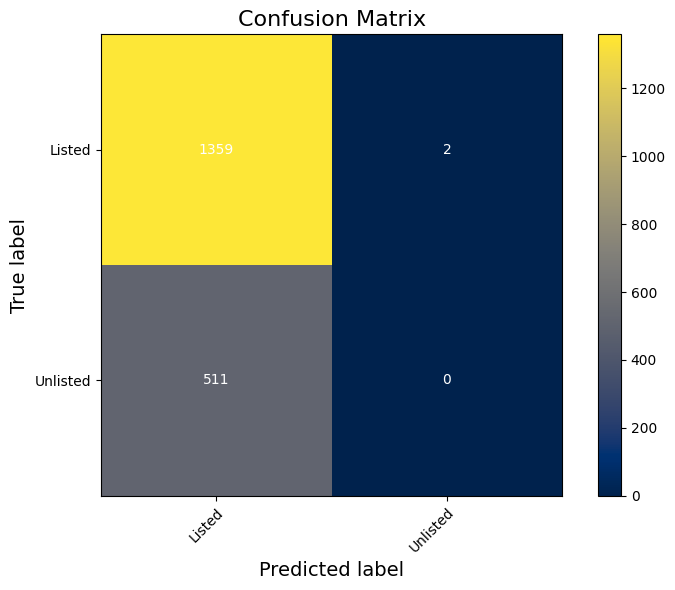

In [60]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_tfidf, y_pred_knn_tfidf)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.1.2 KNN with TF-IDF applied to merged comments and description

In [61]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_tfidf2, y_train_tfidf2)

# Predict the labels for the validation set
y_pred_knn_tfidf2 = knn.predict(X_val_tfidf2)

# Print the Classification Report
print(classification_report(y_val_tfidf2, y_pred_knn_tfidf2))

C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1361
           1       0.73      0.55      0.63       511

    accuracy                           0.82      1872
   macro avg       0.79      0.74      0.75      1872
weighted avg       0.81      0.82      0.81      1872



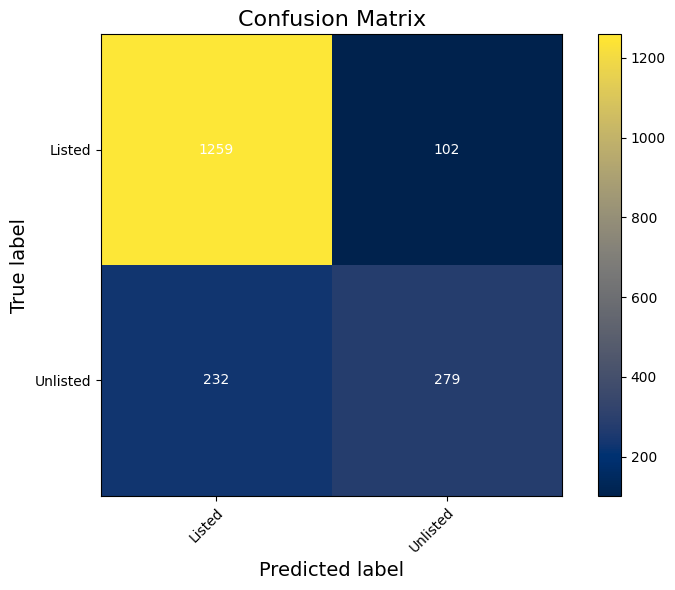

In [62]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_tfidf2, y_pred_knn_tfidf2)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.1.2 KNN with BoW applied only to comments

In [63]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_bow, y_train_bow)

# Predict the labels for the validation set
y_pred_knn_bow = knn.predict(X_val_bow)

# Print the Classification Report
print(classification_report(y_val_bow, y_pred_knn_bow))

C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.94      0.83      0.88      1361
           1       0.66      0.85      0.74       511

    accuracy                           0.84      1872
   macro avg       0.80      0.84      0.81      1872
weighted avg       0.86      0.84      0.84      1872



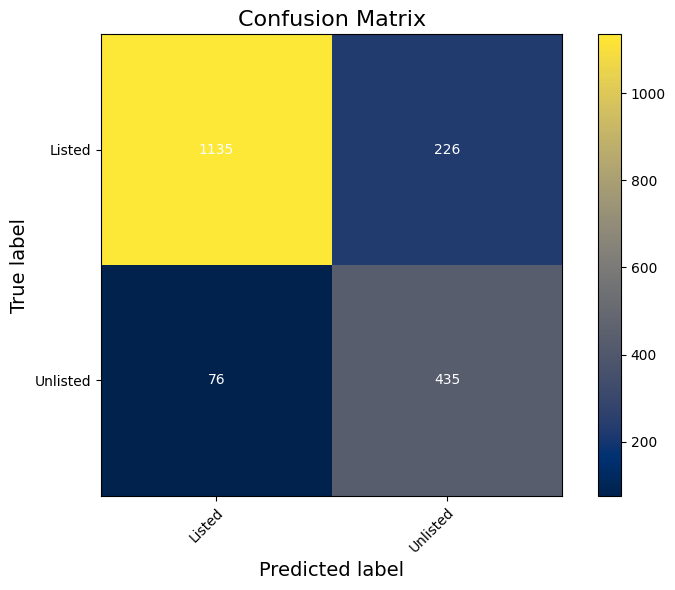

In [64]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_bow, y_pred_knn_bow)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.1.2 KNN with BoW applied to merged comments and description

In [65]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_bow2, y_train_bow2)

# Predict the labels for the validation set
y_pred_knn_bow2 = knn.predict(X_val_bow2)

# Print the Classification Report
print(classification_report(y_val_bow2, y_pred_knn_bow2))

C:\Users\TCastilho\anaconda3\envs\TextMining\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1361
           1       0.58      0.77      0.67       511

    accuracy                           0.79      1872
   macro avg       0.74      0.78      0.76      1872
weighted avg       0.82      0.79      0.80      1872



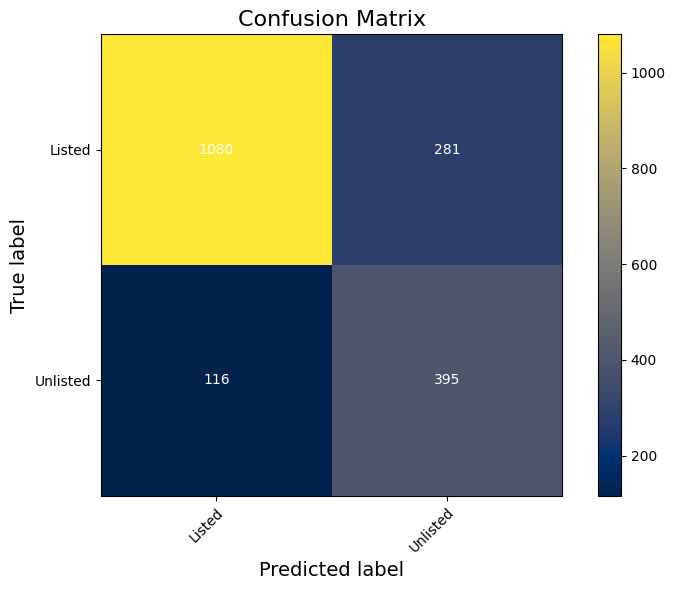

In [66]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_bow2, y_pred_knn_bow2)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.1.2 KNN with GloVe applied only to comments

In [67]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_glove, y_train_glove)

# Predict the labels for the validation set
y_pred_knn_glove = knn.predict(X_val_glove)

# Print the Classification Report
print(classification_report(y_val_glove, y_pred_knn_glove))

ValueError: could not convert string to float: 'nice flat lovely classy beautiful location wonderful weekend negative point noise air conditioning apartment leave connected pedro told u solved soon probably find fixed pedro really nice host stay lisbon round sens great part due pedro studio x description apartment exaggerate absolutely reality perfectly located old building leaf good taste mouth come visit lisbon recently renovated clean great attention detail considering quality position furniture x confortable bed sleept fabulously little external noise despite center city x astonishing view awaits day time castle seeview x attention pedro co unbeatable always mindful make stay enjoyable x incredible stay pedro apartment apartment impeccably decorated great location close everything balcony flat provided fabulous view even able eat breakfast outside treat pedro wonderful host helpful kind also provided great recommendation thing lisbon fantastic apartment amazing location stayed couple friend asked better experience x pedro kind accommodating host everything prepared nicely u arrived also provided informative paper instruction apartment recommendation location restaurant area x although apartment one double bed three u staying apartment never issue sofa large enough sleep one person comfortably might add view balcony beautiful benefit high well situated building x overall excellent stay easily best deal town found pedro apartment thorough search dozen likely hundred lisbon listing intrigued mix quality interior design location price place exceeded expectation inspired following poetic review x pantheon par paradise pedro photographically plainly presented pad pair picture postcard premise perfect panorama petit pearl parlour peace poetic pessoa peninsular picturesquely placed perfectly positioned pure pleasure panorama paramount probably part private passion part proper profession pedro personal property project prioritises palpable portuguese pedigree pricy piece play pivotal part pedro pricing pack pleasant punch prepare pay peanut pal priceless could rate apartment star would apartment definitely best place stayed trip would recommend absolutley anyone even hotel pedro professional tell take great pride unit upon arrival pedro everything spotless working order apartment even better looking photo left coffee left u orange morning soft towel new hand soap u even helped birthday surpise set wine cheese tart boyfriend nice touch looking perfectly located high end clean place stay amazing view look fantastic apartment personally apartment certain way would best place stayed holiday across spain portugal x x everyting exquisitely detailed apartment ultra modern look feel big round mirror living area extensible lamp thoughtful amenity juicer dishwasher view breathtaking bay vista cobbled street church metro nearby shopping district trendy bar restaurant e g bairro alto minute walk away elevator especially helpful hauling heavy bag x x going lisbon must stay regret great flat everything perfect x thank appartemer ideal decouvrir lisbonne extrememer bien situ decoration tre agreabl tre lumineux vue magique tage merci avoir hotes gentillesse leur petit attention tre satisfaire si revien avoir lisbonne ce endroit florence super appart tre bien situer propre calme mari sejourne jour rien avoir redire retournerai place fantastic cute elevator building made moving luggage easy picture justice balcony incredible view city water bed comfortable kitchen great shower incredible antonio met u let bag pleasant apt min away baixa chiado station convenient hopping area lot restaurant cafe store lago carmo closest square bit quieter amazing cafe major elevator easy access rossio station lot light apartment eye mask would good want sleep would recommend anyone amazing tastefully decorated apartment amazing location amazing view fault perfect place two stunning balcony stayed girlfriend pedro apartment day really great time everything perfect pedro team nice helpful everything perfectly arranged minutest detail even small personal card waiting u apartment moreover apartment super stylish also completely equipped everything imagine possible need automatic orange squeezer special fish knife highlight apartment definitely king size bed view roof lisbon tejo really enjoyed breakfast sunrise romantic dinner sunset balcony furthermore extremely high wall old fashioned stair case architecture building wonderful apartment located beautiful atmospheric quarter centre lisbon everything may need close conclude absolute recommendation gorgeous building apartment design view praca asked better place stay problem live apartment full time great location middle chiado two terrace great view river tejo tagus metro station vicinity major point interest walking distance room spacious well designed stuffed cool modern furniture every kind equipment kettle microwave toaster nespresso machine dishwasher etc etc good bathroom everything clean put simply apartment superb every possible way x important note located downtown major city vibrant life day night sound level appropriate especially window open perfect location stunning decoration full equipment appartment small jewel perfect day relax center chiado amazing apartment picture true stunning piece surrounded combined spectacular view highly recommend staying right thick action lisbon yet noisy stay heading lisbon x x happy traveller jane perfecto repetiria dudar recomendario cualquiera empezar localizacion ideal visitar ciudad decoracion apartamento tratar pedro antonio guardar maleta tiempo hacer falta recomendar restaurante genial poder pedir mas estancia perfecto gracias x d appartamento pulire molto curato arredare gusgere nonostante tratto monolocale essere ottenure ottimo divisione spazi rimpiangere stanza piu angolo cottura accessorio servire preparare piccolo pasto colazione vista ciggere molto suggestivo due piccolo balcone potere essere usare sorseggiare drink buono Caffe macchina nespresso Cialde disponibile stanza bagno vantare box doccia cristallo molto grande location perfetto visitare maggiore punto interesse lisbono piede caratteristici tram passare poco centinaio metro portare Casa potere raggiungere poco minuto piure bello attrattivo citta chado inoltre area molto elegante ricco ristorante caffo ottimo negozio consiglio vivamente appartamento mum stayed chiado studio iii truly amazing apartment beautifully decorated best everything interior design kitchen equipment loved breakfast sitting sunny balcony view across rooftop river location great right heart lisbon easy access train tram shop restaurant x definitely recommend friend use next trip lisbon nice comfortably appointed apartment chiado suitable couple enjoy amenity easy access restaurant etc loved apartment decorated tastefully amenity needed lot charm location convenient antonio met u friendly helpful would stay without hesitation would recommend others wanting stay neighborhood wonderful corner unit apartment bright clean beautiful balcony view city nicely furnished true picture showed window shutter curtain effectively blocked light night sound street minimal x x apartment located within walking distance restaurant transportation grocery store right across street x x pedro met u apartment scheduled correspondence easy quick useful information apartment well fresh orange coffee use nice welcoming touch happy stay recommend others flat spacious bright airy perfectly located right centre really enjoyed stay chiado studio iii amazing place absolutely amazing real x x love enjoyed stay appartement central location amazing place explore city love design appartement view stunning clean appartement provide modern thing clean well cool designed x pedro antonio nice helpfull good comunication everything perfect gonna love obrigado amazing place cannot wish better location view apartment cherry cake see bed perfect romantic weekend x arrived bit late antonio waiting u welcoming many thanks chiado team great apartment perfect location pedro always available responsive question arriving meet u arrival apartment fantastic feel much bigger great use space also amenity would need short stay best feature though definitely view would rival rooftop terrace lisbon location flat ideal get around lisbon foot metro x flat cosy morning november breakfast balcony view sea marvellous x recommand two person book stay pedro flat apartment really great looked like picture view fantastic corner building meant balcony running around side apartment tidy arrival even couple added bonus like great coffee machine little chocolate treat boyfriend birthday celebrating contacted host ask way arrange champagne room arrival much delight agreed meant arrived champagne strawberry balcony overlooking amazing view lisbon total surprise boyfriend loved asked better happy perfect place stay lisbon great time appartment beautiful good located center city amazing place chiado studio iii amazing place great apartment perfect location getting around lisbon foot public transportation amazing view loved opening window seeing lisbon skyline either bed one two balcony practically speaking great internet access english language cable tv ipod dock fully stocked kitchen appliance utensil could possibly need window shutter block light noise making apartment great place sleep especially appreciated pedro antonio stocking apartment nespresso orange jam return lisbon would definitely stay prendre petit dejeuner balcon face avoir mer rien mieux studio vrai cocon plein centre lisbonne proche transport quartier festif silencieux confortable tre bien decor tout eter parfaire grand merci avoir equipe chiado studio would definitely recommend apartment location perfect quiet street great neighbourhood load restaurant surrounding street short walk barrio alto going apartment look exactly like picture including amazing view balcony apartment everything needed including nespresso capsule morning perfect internet access pedro antonio excellent host timar localizacao junto chiar proximo infinidade meio transporte otimos cafes bar ser visitar aler proprio shopping armazem chiar aler contar vista representar exatamente poder observar foto apartamento atencao zelo acessibilidade anfitriao equipe sao ponto forte Estadia certeza local reservariar novamente especialmente amplitude comodidade fornecer apartamento arredor onde localizar great stay location absolute perfect central easy get around apartment clean cosy well maintained wall slightly thin could hear noise next door big problem would definitely recommend pedro prompt responding email message really helped peace mind terrific week end amazing flat x x location perfect located city center nearby nice animated street rua garett min walk get praca comercio one lisbon main square x x studio great furniture really nice bathroom pedro place awesome moment greeted antonio day lisbon loved stay place look exactly like shown site view front window tagus river see castle saint george side window pedro spared expense decorate condo appliance furnishing must come designer store chiado want dozen restaurant shop nearby carmo square outside door many great restaurant specialty grocery store across street larger grocery store couple block away double bed comfortable feather pillow comforter bonus large tv many english language station small kitchenette included kettle coffee maker wine glass welcomed chocolate coffee pod bowl orange visit january night got chilly appreciated three radiator wifi worked perfectly would plan next trip lisbon around date condo available love place location team manages apartment place good description clean also appreciate early check able get nap long journey toddler small incident stay team responded fast could found able open gate silly reason fault love lisbon visit every year appreciate much atmosphere city people food beautiful light x x studio perfect close friend everything x bar restaurant museum x beautiful view river front bed x full sunshine balcony x san jorge castle left side x perfect location appliance bathroom kitchen x great bed simple tasteful decor x x vegetarian restaurant organic store near x x hope studio free next time go lisbon x x lf x x x studio apartment perfect location perfectly appointed beautiful view highly recommended studio vraiment tre agreabl tout avoir faire conforme photo tre bien place tre gentil accueil wife stayed studio four night visit lisbon x x picture apartment justice commanding view water surrounding neighborhood apartment perfectly situated le minute walk metro key tram line countless place eat enjoy cafe antonio waiting u arrived check breeze pedro super responsive pre arrival query would definitely stay opportunity arose super cool studio right city center metro station walking distance also supermarket lot bar restaurant close studio owner super friendly helpful definately recommend studio wife stayed pedro studio chiado could dreamed better home away home studio third floor perfectly located old building affords great view neighborhood city beyond character old building maintained tiled stairwell old lift center wide plank wood floor huge window wooden shutter intact high ceiling studio well planned modern upgrade marble tiled bathroom great shower double glazed glass big window keeping flat cozy quiet perfect little kitchen complete dishwasher espresso maker x felt right home flat given lisbon much offer right chiado neighborhood via short walk tram metro train ride away got take much beautiful city incredible restaurant shopping clothes shoe gift beautiful architecture stunning vista right doorstep x pedro antonio checked u gracious accommodating host really though everything needed offer guest comfortable stay lisbon pedro team ready recommendation good food must see part city best part air bnb experience local tip x bother looking elsewhere studio cozy three flat building coming back lisbon want stay x thank pedro apartment great beautiful view perfect location super clean well run pedro place get value money beautiful river view light port shine front night step balcony barcelona foot amazing stayed night pedro apartment great like postitive review read previously report positive thing apartment good central location yet pleasantly quiet newly renovated comfortably furnished immediately felt home pedro right arrived showed u everything detail tip attraction restaurant cafe helpful view balcony wonderful great day lisbon come back definitely pedro apartment thanks everything appartemer accueil irreprochable situation ville ideal calme tout etant centre ville appartemer tre agreabl propret impeccable deco soigne avoir recommander studior bem localizar confortavel bem equipar bom gosto x d Pedro extremamente prestativo educar x d bom geweldig appertement goed liggen mooi uitzicht aanrader x d appartemer tre agreabl bien decor facile avoir vivre calme prendre cafe balcon profitant vue toit tage delice bon situation quartier agreabl chiado studio lll lived name every way truly amazing place beautifully decorated clean well equipped perfect location view balcony breathtaking really enjoyed sitting balcony looking city waterfront pedro team made u feel welcome always easily available question phone antonio met u metro showed u easiest route building gave u orientation apartment provided complimentary coffee jam orange chocolate would highly recommend amazing place anyone plan visit lisbon would definitely stay pedro chiado flat wonderful antonio waiting u even though flight delayed flat clean nicely decorated perfectly central location gem sure apartment lovely well appointed view multiple balcony stunning spotty mobile service led miscommunication check time antonio gracious accommodating neighborhood bustling lot shop restaurant sightseeing destination doorstep metro larger train station town trip within minute walk first visit lisbon hopefully last go studio antonio met u apartment show u around apartment needed know staying also left apartment well equipped everything needed week stay well situated near biaxa chiado metro close shopping restaurant loved stay apartment made u feel like part city visitor grocery store across street excellent restaurant close list recommended site restaurant apartment common washer available building perfect u couple question stay pedro quick respond u thank wonderful stay staying lisbon would highly recommend staying stayed day lovely time great location next beautiful square easy access lot great restaurant incredibly balcony view tagus antonio met u arrival really helpful gave u good tip place eat visit flat clean nicely decorated perfect size recommending flat friend family perfect flat perfect location lisbon flat modern spotlessly clean every comfort needed view fantastic found location easily assistance antonio friendly helpful thankyou pedro team wonderful day city would happily recommend place anyone partner returned fantastic night stay lisbon asked great apartment ideally located beautifully furnished happy choice would definitely stay return lisbon hoping near future since great time antonio meet u arrived extremely helpful answering question pedro also booked u taxi back airport early flight coming home made life much easier u overall loved lisbon loved apartment thanks pedro team million thanks pedro place really amazing made trip perfect still overwhelmed decor location friendliness absolutely everything warmly recommend place big thanks greeting helsinki amazing stay chiado apartment sad leave x x stayed lisbon night chose chiado great location absolutely perfect right centre lisbon minute walk train station everything walking distance cool bar restaurant seemed minute away quiet little supermarket around corner buy food drink essential x x apartment clean spacious tidy plus cute balcony great view city sea little kitchen area essential plus nespresso coffee mashine nice extra x x definitely recommend apartment would book next lisbon visit x x best x nicky mark london many star reflected tagus moonless night many give pedro team extraordinary living space extraordinary location extraordinary view hand best traveling experience life great deal experience opportunity stay chiado studio iii hope go back wish could go back tomorrow daughter stayed lisbon one night thrilled arrived find charming studio apartment fantastic view shopping restaurant short walk away taxi required leaving cascais following day train station short walk away thank host making stay night remember hallo liebes airbnb Team x d Wohnung Lage Wohnung gut Einrichtung fur Ferienwohnung wichtig Gegenstand vorhanden x d bisher Kompletter ausgestattet Ferienwohnung mieten x d Wohnung werden jederzeit empfehlen x d Pedro Anleitung perfekt gut dank x d Gabrille excelente instalacoes localizacao recomendadissimo studio beautifully designed provides comfortable functional lovely place stay work thanks balcony open room work feel like work impressed design one thing note shared space several studio aware ahead booking nevertheless place highly recommended portugal studio tre bien situer bien equipe amenage gout x recommander ce appartement thank much beautiful place pedro antonio lovely helpful apartment stunning view extraordinary loved every minute lisbon last week three accommodation choice proved absolute winner beauty hospitality view bellisdima cleaning steategica affirmation elegant chiado allows reach short time even foot charm lisbon beautiful finely rustrutturato welcome study absolutely consigliato tre agreabl sejour ce appartement moderne balcon superbe vue ideal visiter lisbonn hote tre accueillir fruit caf petit chocolat avoir arrivee recommander ce appart appartement grossartig wunderschon einrichten sauber unvergesslich Blick tejo perfekt liegen Lissabon fuss erkund Minute aufenthaltes nossen werden Lissabon Reist Unterkunft warmstens empfehlen wonderful place modern amenity needed great host beautiful view kind enough wait late arrival offered excellent direction would recommend anyone looking modern apt historical area walk everywhere taxi know host gave good landmark instruct find book available great value lisbon great definitely back country city apartment really loved drinking wine balcony enjoying view x x host pedro team responsive professional made experience painless easy x x listing description apartment look beautiful pictured view even better found everything needed provided good three people couch extra long x x neighborhood great location lago carmo chiado near major site cool neighborhood like barrio alta apartment situated back square mean get hear music square drifting open window flat major plus book x x con internet sometimes work go outside apartment get signal however apartment often really impact u enough contact pedro fix ac blew cold afternoon cold night even set temperature thing easy fix probably address team post avoir ete enchante appartemer tre fidel photo super x propre vue inoubliable fleuve vrai immeuble tre ancien appart completement renove quartier chiado tre bien situer merci avoir antonio accueil petit attention equipe petit mot bienvenu chocolat confiture fruit frais beaucoup apprecie jour avoir lisbonne chiado studio iii encore merci x manon michel beautiful apartment wonderful location exactly described ticked box stay lisbon would certainly return lovely apartment nice view city river huge choice bar restaurant close pedro apartment well set kitchen area espresso coffee machine dishwasher appliance also air conditioner hot day night bathroom modern marble lined however often unpleasant smell coming drain pedro antonio easy communicate provided excellent information time extremely happy brief stay charming lisbon apartment x met promptly shown apartment pedro friend antonio welcoming gave good advice stay x x apartment described superbly positioned lisbon close shopping resaurants sight clean well appointed especially appreciated nespresso machine first coffee day view river bed beautiful x x first time lisbon first stay airbnb asked many thanks would hestitation recommend friend stay apartment x x many thanks great host great location cozy house even elevator house supermarket cafe opposite building le walking distance find amazing collection restaurant lovely lovely place cab driver dropped u sent u totally opposite direction managed find place end boy location amazing right centre everything apartment clean antonio receive u smile amazing place absolutely gorgeous stunning view loved time every detail stay perfect host gracious easy connect communicate left great list recommendation place eat would love opportunity stay stayed pedro apartment two night absolutely loved place location central get nice area plenty dining shopping option nearby well bus stop train station travel around x x building old good condition put straight local mood apartment fantastic frankly photo justice view exceptional eat breakfast balcony sunny bed comfortable washing machine available x x would definitely recommend place stayed last part honeymoon impressed picture even justice beautiful flat bed comfortable view breathe taking location perfect flat everything need stay team great host everything needed make sure comfortable also nice suggestion list great food place would highly recommend flat anyone staying lisbon cool apartment exactly described center lisbon host sent friend check u late train could manage everything felt great great communication trip dealt pedro email antonio helpful accomodating street little hard find research area prior travel apartment described view great walkable major city attraction lively square nearby prepared walk truly city seven hill elevator working one day stay host made sure fixed timely manner wonderful stay overall perfekt Apartment fur Stadtetrip Lissabon fur Person x d Super Lage Super Sauber Netter Empfang herrlich Blick uber Tejo x d vieler nett klein Detail werden jederzeit wiederkommen x d Super appartment mal toll Ausblick Tejo appartment empfehlen wow airbnb experience never forget view apartment breathtaking tejo one side castelo sao jorge side breakfast balcony one sunny morning felt like king lisbon view tejo river magnificent x pedro antonio know host take care every small detail know important thesis small detail everything mean everything worked perfectly perfect wifi water stay warm like really comfy mattress good night rest kitchen appliance highest quality functioning elevator last least design apartment incredible x hesitate book one absolute highlight definitely come back view stay flat lisbon perfect review correct picture justice view balcony stunning bed super comfy location perfect imagine better place stay lisbon spent two really nice day amazing apartment see picture great view river castle flat also fully equipped kitchen case want cook home moreover location perfect minute walking baixa chiado metro station historic cafe brasileira host really nice helpful strongly reccomend choose accomodation case want spend day lisbon pedro teammate friendly super helpful loved appartment well designed interesting space lot little detail taken care make u feel really comfortable definitely recommend place lisbon immaculate studio excellent location pedro incredibly responsive helpful antonio showed u unit answered question loved beautiful view found apartment perfectly sized equipped need attention detail also appreciated decor providing nespresso pod highly recommended parent stayed night piedro flat fantastic time x house beautiful great location furnishing kitchen bathroom everything pretty much flawless made feel comfortable especially balcony provided great view city ocean perfect spot sunny afternoon even though bit rainy feel stuck inside since nice shop restaurant cafe immediate proximity host friendly perfectly time problem check conclusion parent would love come back highly recommend piedro apartment host great place location direction apartment clear antonio kind enough check u early waking view sea fantastic would highly recommend place anyone visiting lisbon fantastisch liebevoll gestaltet appartment vieler toll Detail viele wohlfuhlfaktoren Angefang Nespresso Maschine toll Tip kulturell kulinarisch Aussicht umwerfend viele dank Pedro antonio fur gerne kommen pedro everything could wish make arrival stay comfortable location apartment perfect well facility furniture recommend place everybody interested great week end lisboa apartament well located appliance working completely amazing view river fantastic breakfast balcony huge window good bed nice couch everything perfect thank pedro antonio nice time beautiful lisboa much enjoyed staying pedro studio location perfect right heart chiado district short walk bairro alto baixa metro tram stop also nearby getting anywhere lisbon straightforward definitely back girlfriend spent night christmas chiado studio nothing short star experience pedro professionalism first class made check check process extremely easy comfortable apartment absolutely spectacular extremely clean well designed layed plenty naturally light view picture justice far best airbnb experience definitely back amazing stay place everything location could perfect building elevator beautiful view balcony apartment lot amenity including access washing machine pedro antonio great host welcomed u explained everything worked gave u good tip dinner option pleased find location apartment extremely convenient apartment clean everything need balcony added bonus host also accommodating fantastic stay lisbon definitely back obviously would totally recommend pedro place loved stay pedro studio awesome spacious comfortable everything feel home enjoyed every single moment thanks pedro antonio help information u given hope come back next year strongly recommend pedro place x obrigado wonderful experience apartment perfect centrally located beautifully furnished good taste functionality thank recommend future moment arrived apartment easy direction airport provided pedro shocked lovely picture justice balcony beautiful feature apartment especially sun shining everything might need thought little touch really make difference apartment right heart everything shop cafe close everything walking distance asked better place enjoy lisbon first time thanks lot perfect trip pedro antonio conocer personalmente realmente amable atento servicial llegar apartamento antonio esperar brindo informacion util lisboa facilito mapa ciudad casa tal mostrar foto lindo ordenado limpio calida mantuvimos comunicado pedro estadia ningun tipo inconveniente flexible check in chek out acordar horario veniar mejor asimismo ubicacion apartamento inmejorable cerca lugar mas bello concurrido lisboir dispuesto edificio antiguo hermoso tambien realmente pasar bien sentir comodo ambiente confortable recomendar cien ciento mucho gracia pedro mucho gracia antonio ma eugenia rubir went back second time lovely first great view great room great host highly recommend really nice appartment spacious bright top floor building right centre chiado balcony breakfast sun looking city river definitely recommend communication pedro really easy able check directly arriving studio apartment delightful exactly picture showed everything needed stay central location easy get sight rd floor beautiful view rooftop tagus little balcony lift small supermarket across road plenty lovely eating place nearby hesitate recommend anyone really enjoyed staying pedro apartment beautifully furnished well equipped centrally located close metro major lisbon attraction loved view balcony perfect place morning coffee pedro great host explained everything well perfect place stay lisbon lovely stay chiado studio iii week location fantastic perfectly situated urban exploration lisbon adjacent building lovely outdoor square organic grocery store variety restaurant cafe block walking metro baixa bairra alto neighborhood also within easy walking distance x x flat beautiful light view river surrounding neighborhood stunning terrace door open every morning night letting breeze bed big comfortable kitchen area small everything need make full dinner nespresso machine nespresso store also right around corner shared laundry facility floor x x pedro antonio running well organized operation lisbon friendly efficient patient easy get touch airbnb back x x x host met u upon arrival apartment found according add well equipped perfect clean condition comfortable light spacious studio amazing view castle tago including lovely balcony sunny breakfast location good close subway lively busy chiado bairo alto however place quiet x u definite recommendation wonderful around lisbon experience communication meeting pedro team arrange access apartment extremely easy apartment exactly pictured clean charming well designed renovated flat older building great view rooftop harbor even castle city apartment location perfect middle chiado shopping restaurant district hill bairro alto restaurant bar easy walking distance main lisbon sight metro train station etc pedro team restaurant activity recommendation ready waiting friendly welcoming great time day trip would stay heartbeat thanks much tout eter juste parfaire identique avoir attendre antonio eter present avoir endroit rdv avoir bien expliquer tout dont besoin savoir plus eter tre sympathique serviable vraiment chambre juste parfait sejour parfaire fantastic apartment everything exactly pictured host attentive need made week long stay lisbon enjoyable experience apartment centrally located within easy walking distance metro train station terrific restaurant shopping would definitely like stay next visit lisbon five star fantastic host amazing apartment great view great stay apartment clean laundry well decorated come everything need great stay nespresso machine welcomed suprise located centrally stone throw away great bakery shop book regret anfitrion detall recibio antonio pesar haber problema trafico llegar hora x d explico amablemente uso apartamento dar tip util disfrutar hermoso ciudad lisboa x d todo informacion bar restaurante lugar visitar impresa ingl breve expicacion adema suministro mapa ciudad x d detalle cafe capsula mermelado tarjeta recibimiento hacer mas calido estadia x d detalle importante x d pascua especialmente regalarno roscar tipico x d hacer late check out nuetro vuelo saliar tarde problema otorgar él costo adicional apartment perfect need x fantastic view big comfy bed good shower great location smooth communication owner exciting lift x many thanks great time pedro gentle apartment nice clean perfect position minute walk baixa chiado metro arrive praca comercio minute pedro also gave u list city followed x excellent perfect brilliant thanks thanks much sharing apartment u meet arrival fresh clean well thought space close everything walk major sight beyond beautiful place lisbon x passer tre agreabl sejour appartemer ete sensible avoir tout petit attention laissee equipe accueil chocolat confiture orange petit savon ler anesse meme bouteille vin blanc portuger dedommager vue tage encombree echafaudage malgr travail artisan tre discret appartemer tre calme tre bien place decoration renovation tre soignee emmenagemer tre bien passer condition prevue pedro antonio tre sympathique prevener idee restaurant teste apprecier avoir recommander absolument pedro amazing job making apartment feel like home three day greeted u gave u ton great advice place go meal mentioned going day trip outside city also sent u recommendation going really accommodating friendly put u ease right away x x apartment everything need incredibly clean beautiful view well situated city lisbon without noisy really easy u get thing wanted see walking distance lot older part city many restaurant bar riverfront plus subway station block away parking lot around corner x x long story short definitely would recommend apartment anyone traveling lisbon apto tal ver foto bien decorado luminoso linda vista camo comoda sabana toalla impecable bien equipado pedro eficiente amable indicación dejar restaurante bar excelente detalle bienvenido botello venir capsu cafe bombón naranja desayuno agradezar tema importante ubicacion mejor imposible cerca zona lindisimo ahora mejor alquilamos gracias pedro really nice stay lisbon x flat quite central cosy similar description x pedro antonio welcoming accomadating x reason back beautiful apartment prime location wonderful view balcony instant respond got pedro whenever needed help stay thanks pedro stayed chiado studio iii two time portugal time extremely accommodating arrival time studio even amazing look airbnb antonio done great job decorating layout place super clean neighborhood great could go suffice say considering amazing place lisbon accueil antonio tre apprecie donne information clair precise appartemer superbe propre calme bien equipe sejour merveilleux tout proche seul hic echafaudage cachaient vue magnifique traval devoir faire merci pedro avoir recommander yve awesome flat awesome location great thank pedro host u lot petite attention appreciate want discover lisbon best condition go fantastic airbnb experience pedro responsive email antonio met u time showed u apartment awesome cool convenient location minute checked holding key home lisbon everything worked including air conditioning crucial spotless arrived easier better antonio met u receive u punctually despite flight late apartment absolutely gorgeous view tagus river bank praca cu commercio bed balcony apartment extremely tastefully decorated gorgeous old building complete old fashioned elevator comfortable necessary amenity close downtown area shopping bar train station main sight x sweetest touch hand written letter two chocolate u left pedro team pedro responsive answered question including many helpful tip navigating neighborhood even called u taxi morning airport antonio kindly waited u arrived later expected helpful booked u taxi departure place amazing really tastefully decorated central location quiet rd floor stunning view river would definitely recommend perfect antonio super helpful setting u apartment could nicer great location great apartment location terrific apartment well appointed bright balcony nice thing view river roof breathtaking city right outside door pedro great host fantastic location lovely apartment helpfull host amazing city better wish stayed longer next time everything worked fine key handover till left nice central flat host wonderful meet u arrival even though early x location superb right heart everything apartment well thought nothing missing term facility would stay return lisbon beautiful apartment fantastic position well appointed everything could possibly need stay super comfortable bed everything obviously thoughtfully chosen arranged chiado district ideal location apartment well placed shop restaurant bar public transport popular attraction like archeological museum short walk apartment view spectacular great communication owner pleasure meet antonio check honestly asked amazing place host highly recommended fantastic well located comfortable modern stylish flat extremely clever interior design made modest size studio seem much larger pedro clearly thought everything traveler might want need accomodation including excellent hot strong shower ice cold air conditioning warmly greeted luis orientation complete dining recommendation flat instruction appreciate care concern pedro show guest would hesitate recommend accomodation friend family perhaps return super apartment exactly matched description comfortable well equipped stylishly decorated location proved ideal exploration central lisbon position top floor renovated th century town house accessed quaint old fashioned cage style lift romantic great view city lot light although meet pedro colleague antonio met u promptly showed u rope made u feel immediately ease bottle rose nice touch list restaurant recommendation provided useful tried u chiado posh good mercado da ribiera really interesting pop restaurant approach lot different kitchen round central dining area covered market lisbon well worth visit accommodation would hard beat amazing apartment amazing view location also pretty fantastic close shopping lot night life would definitely stay one pedro apartment back lisboa asked nicer experience chiado studio one best airbnb place stayed stylish comfortable fantastic location explore lisbon communication pedro excellent smooth check easy get airport metro apartment fantastic metro station close apartment first class loved welcoming bottle rose chocolate thoughtful welcoming absolutely loved view room targus river sensational would highly recommend staying pedro chiado apartment feel chiado special stunning girlfriend spent fantastic night amazing apartment loved everything place super charming renovated everything could ask view apartment amazing well placed balcony make experience location could better close place want go finally pedro engaging answered question really made u feel welcome one best airbnb place ever stayed absolutely loved place perfect every way warmly greeted luis showed u round gave u restaurant recommendation turned excellent location better central remarkably quiet third floor u best bit balcony breakfast sundowner glorious view studio spotless equipped high standard everything could possibly need pedro helpful throughout giving u excellent direction airport responding quickly question first experience airbnb bar set high highly recommended thank pedro apartment even centrally located thought short step main road metro station close property manager waiting u arrive even bottle wine would stay spent weekend lisbon friend decided give airbnb try greeted charming host arrival showed u around flat made u feel welcome apartment excellently located clean spacious thoughtfully furnished spent evening chilling bottle wine balcony gazing rio tejo heading dinner enjoyed stay much would highly recommend check place love magnifico studio cuore lisbono pulire aria condizionare luminose bello balcone tavolino sedia rilassare si davanti panorama tejo benvenuto pedro team accoglienza fare trovare buono bottiglia roso frigo due cioccolatino biglietto bene arrivare posizione ottimo due passo convento carmo accanto tutto via piu centrale angolo supermercato biologico brio tre minuto piede fermare metro baixa chiado fine settimana puo essere po rumoroso verso sera bastare chiudere finestra attivare condizionatore leggere strategicamente posizionato davanti vista fiume molto romantico comodo cannot find better apartment one beautiful clean space center chiado pedro team extremely efficient helpful awesome host nice experience profesionnal great flat lovely part lisbon great time would recommend thanks hospitality great accommodation great view well located exploring lisbon apartment everything needed including seemed like new bed made good night sleep fantastic shower antonio good host responded promptly query highly recommend listing exactly described loved apartment met time appreciated half bottle wine orange provided wonderful location fantastic view river stylish well equipped apartment host responded enquiry promptly efficiently professional greeted pedro representative luis arrival explained working apartment left nice touch complimentary bottle wine u studio presented described ad fact felt bigger picture allude long narrow verandah run around two side providing great view castle river well great spot sunset drink bathroom kitchen facility adequate bathroom quite new laundry facility shared two studio level problem modern machine provided location excellent short walk baixa chiado metro baixa shopping area via santa justa elevator shank pony bairro alto also pleasant square adjoining building higher side providing easy access bar restaurant would hesitation recommending studio couple booking return lisbon tolle appartement perfekt lage x d viel dank place absolutely wonderful starting location minute rossio square lovely view tejo river st george castle ending studio arranged fresh design lot light well equipped real pleasure stay warm cosy place feel home host kind waited u showed everything around minute studio everything one would need cooking area living comfortable bed certainly keep mind next visit lisbon also recommend everybody perfect stay oustanding apartment heart lisbon location view balcony amazing pedro crew amazing extremely helpful late arrival pm coffee wine chocolate fruit arrival lovely touch greatly appreciated x d gegend Super zentral Apartment Wunderschon Blick tejo sogar Bett x d Perfekt klappen Betreuung Ort zuvorkommenden x d einfach Super response time fast responsive understand query answer positive studio exactly picture posted impress cleanliness room bright everything clean except one live far cleanest compared rest airbnb stayed th one well equipped stay bed sheet pillow comfortable towel clean wifi speed reasonable speed thing improved carpet tv area look little old feel dirty host flexible safe keep bag check antonio friendly helpful thank wonderful time highly recommend team place cheer gabriel excellent experience beautiful apartment amazing view centre lisbon strongly recommend apartment courtesy pedro absolutely fabulous x say far best airbnb apartment excellent luminous tidy well equipped stylish room furnished neatly beautiful style first airbnb feeling living ikea city worn furniture apartment thought furniture bought assembled especially show personal touch fact look one want live actually impressed x apartment situated centre lisbon one get everywhere foot located border chiado excellent restaurant shopping road practically doorstep bairo alto city night vibrant underground away x facility apartment great warm thanks luis waited u provided nespresso cap bowl full tasty orange bottle wine fridge felt touched little arrangement excellent dishwasher kitchen hairdryer bed good quality back pain hanging common room hall washing machine want stay longer laundry elevator old fashioned lovely way work fine keep one finger tap light go door neatly shut luis also provided u address restaurant nearby away one tried great x go back lisboa certainly try apartment even would alter holiday date little bit order get free plan visit lisbon go absolutely worth apartment well equipped nicely furnished clean perfect location heart one nicest quarter lisbon host always heplful request e g booking taxi organizing baby bed nice view balcony wireless access worked well husband early stayed apartment november loved exactly described advertisement met antonio went every thing detail u recommended several restaurant close pleasure trying stay pleased find building elevator making easy reach rd floor apartment always felt secure within apartment important u older couple front balcony river view enjoyed sitting evening local red apartment walking distance shop many tourist attraction largo carmo metre front door awash many little restaurant outdoor dining would certainly stay apartment recommend anyone looking somewhere central stay lisbon great experience loved place location perfect studio apartment beautiful exactly like picture see ocean window husband really enjoyed staying close chiado metro shop department store supermarket right next door apartment lot thing need cooking problem good luis helpful organise taxi morning u go airport everything smooth stato delizioso appartamento solo due giorno essere esperienza positivo sotto punto vedere appartamento molto carino arredare gusgere inoltre trovare cuore citta proprietario molto gentile disponibile tornare ci sicuramente amazing place amazing city fantastic stay location wonderful close shopping nightlife yet apartment still quiet night could asked better location within walking distance anything wanted apartment clean looked exactly like picture given welcome gift bottle wine perfect sip beautiful balcony happy apartment stay ete tre bien acceuillis quelque petit cadeau bienvenu comme bouteille champagne vin quelque fruit appartemer correspondre exactement avoir description charme plus x adore vue luminosit decoration charmer appartemer petit balcon plein sud vue tage soleil hiver eter vrai bonheur x tre bien situer quartier anime central bref eter parfaire returned home lisboa oh god fantastic x apartment probably best apartment new year celebration bed window able see firework great show pedro even spend bottle champagne u u good start beautiful apartment new year obrigado year great thanks lisboa x gorgeous apartment high atop city picture lie perfect sized studio want see castle ocean great look outside want lose weight food wine indulging great skip elevator climb four flight stair lose pedro please perfect many level location great quite yet close cihado best attraction clean modern everything working promised added value beautiful sea city view one window reception great friendly informative definitely added favourite list nice studio old building charm intelligently constructed inside help make everything work modern standard great location heart action nice bonus view one balcony x x nice stay rental owner thought thing small detail made stay much enjoyable relaxing long journey accueil parfaire personne avoir attendre avoir ete tre rapide avoir repondre avoir e-mail disponible explication ete tre clair utile departamento zona privilegiado visto increible comodo limpio ordenado tal mostrar foto recibir amablemente dar todo indicación necesitabar x d recomeir x d one thing wonderful balcony sweet apartment asked simona wife x could done hundred place lisbona way felt place gave choice x x location perfect walking distance main touristic spot x interior design refined x everything need clean x host kind efficient x x definitely place live beautiful lisbon x x p answer yes x x milo parfaire appartemer tre propre decore gout parfaire emplacement aussi lux prendre petit cafe matinal soleil balcon vue tage genial merci tout particulier petit attention avoir arrivee faire plaisir bouteille vin frigo orange pouvoir presser matin petit dej esper mieux avoir recommander sans hesiter reviendron merci ete tre bien accueillir avoir arrivee tout conforme avoir description photo studio vraiment tre agreabl lumineux tout confort necessair merci orange bouteille vin dosette nespresso x sans aucun doute si revenon avoir lisbonne reviendron studio avoir deux metro fameux tramway central tout visite ambiance cosy tranquille bonheur incredible vacation lisbon staying really wonderful flat spacious well lit wonderful large window access two balcony clean comfortable perfectly situated downtown couch bed comfortable amazing view take balcony foot bed wake morning chiado loft studio team positively responsive arranging accommodation question extensive list immediately provided u restaurant cafe bar throughout lisbon proved really terrific absolutely recommend flat anyone looking visit lisbon bereits mal Wohnung gut gefall Toller Ausblick toll Ausstattung mitten Zentrum Lissabon empfehlen underbar lagenhet utsikt hel vag ner flod over castelo fran annan fonstr perfekt lage narhet shopping manga sevardhet kommunikation val mottagen få utforlig beskrivning lagenhet fungera ingen problem vistels rekommendera stark chiado studio iii wonderful place stay lisbon located near metro many wonderful restaurant shopping direction given apartment accurate helpful since apartment smaller side street apartment looked exactly like picture clean everything needed kitchen even access laundry need wash clothes elevator small great pedro left wonderful easter treat u easter bread port air conditioner worked great cooling apartment two small complaint though could used toilet paper provided sometimes sewage smell building apartment old building understandable day left asked pedro book u taxi airport morning came right time next morning looking stay wonderful apartment central location feel home place host prompt arrival explained everything apartment clearly u apartment light spacious perfect couple day lisbon balcony particular lovely eat breakfast drink coffee sun location wise apartment central also quiet could recommend great apt great location clean nice feel like home center lisbon everything great romantic apartment even better photo host extremely friendly suggest apartment friend perfect apartment perfect location throughly enjoyed week pedros apartment highly recommended great lisboa experience apartment like photo description nicer felt like home location perfect easily getting around exploring u nicest part lisboa absolutely perfect think nothing need improvement great host great location tastefully furnished comfortable view well easy communication host helped u store luggage rather lugging around street hour called u cab also would highly recommend wonderful apartment stayed one pedro apartment previously good experience booked another one trip everything described view even better photo showed could fault anything clean everything needed great location fantastic view balcony warm welcome antonio lift welcome bonus pedro appartment delivered best possible experience traveller lisbon x location amenity friendliness attention comfort view could go hour x one pleasant trip experience far manage back x thanks chiado appartement team pedro staff perfect host imagine better airbnb experience accomdating flexible courteous highly recommend love place much antonio welcoming arrived x view balcony amazing apartment cosy felt like home location perfect everywhere x antonio helpful question great communication x highly recommended back lisbon ete accueillir arrive beaucoup gentillesse studio parfaire amenage esprit contemporain tre agreabl tout confort necessair quartier tre sympa tre calme tout avoir cote place charmant malgr situation quartier tre frequent faire tre calme vue studio ideal tage cot chateau autre x bref sejour parfaire avoir recommander amazing studio great location wish could stayed longer adorar studio super bem recebido deixar varia dica sobre Lisboa x d localizacao boa tudo apt novo perfeito x d certeza voltaria x d made feel welcome fantastic apartment better shown photo given beautiful view well located comfortable quiet outdoor terrace bonus would recommend highly apartment good look picture view rooftop water amazing loved stylish apartment clean location excellent close shop restaurant metro also lovely square outside lot restaurant outdoor dining musician playing inside locked building pedro apartment private locked hallway secure fully equipped laundry also provided wonderful highly recommended place stay lisbon pedro prepared room perfect loved every detail flat flat situated one best part town stunning view rooftop old lissabon felt like home like come back pedro apartment amazing view fantastic everything apartment worked well centrally located quiet pedro team really went way ensure wonderful comfortable stay friendly responsive mentioned review would stay apartment returned city first time would return city lisbon specifically stay apartment location location location overwhelming choose place airbnb destination know much found location apartment chiado perfect exploration amazing city quick walk baixa chiado subway stop easily cheaply get airport connection alameda walking distance anything wanted see x x apartment th floor building quiet street grocery store across street public square half block away apartment actually sub unit seems like larger apartment made independent unit front door small common space including washer dryer iron shared unit door separate lock bathroom quiet configuration fine expecting x x loved unit perfect wanted picture show unit exactly one large room comfortable firm bed separate couch cooking area microwave coffee maker cook top separate bathroom nice size plenty hot water c unit helpful hot day room never freezing hot day good enough ton natural light flowing combined great view two side quaint balcony x x appreciated laminated sheet information unit well suggestion local place eat support team helpful first inquiry checkout appreciated flexibility check check time guest schedule permitted x x highly recommend unit would stay thanks host appartemer tre bien situer avoir fois visite profiter vie nocturne autant tre calme tre agreabl semblable photo seul piece plus salle bain separee climatisation plus certain confort ete luire avoir accueillir eter clair explication sympathique log chez habiter qualite service tre eleve rien avoir redire venir fois avoir lisbonne alfama bairo alto fois precedenter meilleur endroit sejourne avoir fois point voir emplacemer qualite logement logement tre bien situer bien equipe plusieurs petit attention attendaient vin frigo chocolat condiment cuisiner bref sention chez apre quelque jour question concerner fonctionnement laveur recu reponse texto minute sechage faire sechoir appartement retourner avoir ce appartmer lors prochain visite beautiful place great location would definitely stay highly recommend pedro also responsive kind let u keep bag apartment afternoon left avoid lugging around city apartment breathtaking girlfriend finished two week trip portugal three night lisbon highlight trip sitting balcony looking water bustling street amazing hope return lisbon staying tre bel appartemer bien amenage canap tre confortable quartier sympa lisbonne photo correspondre parfaitement avoir realit droit avoir petit bouteille vin avoir oranger guis bienvenu tre bon accueil part chiado team excellent place botn regarding location town wonderful view evertything top score u staying night lisboa stay great location center everything place clean view balcony incredible one night even firework show right outside window place bit hard find attentiveness view location high end hotel affordable price wife stayed incredible rental hotel year easily one best area town walkable best restaurant bar sight city spent night drinking wine balcony looking river sunset people watching cobblestone street may end favorite memory trip air conditioning surprising luxury non hotel great host highly recommend get feeling old lisboa amenity charming updated apartment exactly depicted plus surprise bonus sunny view waterfront special find hosting team antonio luis pedro super point francamente perfecto great night stay apartment everything picture great view great area location would stay antonio great host amazing stay lisbon studio apartment view overlook ocean distance everything need make stay wonderful including small surprise make much special wonderful experience team great communication check process flawless apartment well equipped clean washer made life easier dryer rack machine clothes dried quickly fine view balcony real treat location perfect easy get anywhere look forward staying next visit lisbon host communicated well u antonio met u downstairs arrived showed u location excellent apartment pictured little balcony great view would definitely recommend lisbon traveler pedro meet u bang time apartment everything expected beautifully furnished coffee music system etc terrace lovely breakfast light lunch day area x great place stay regard walking interesting historic place even walked amazing graveyard chiado got taxi back part way x x pedro even organised taxi early morning airport x x apartment truly amazing view sea lovely quiet night five star lovely host strongly recommend friend stay x x loved lisbon thanks host plenty information break left apartment enjoyed restaurant suggested x x thank pedro co host wonderful experience lisbon accueil top studio top super bien situer bien equipe rien avoir redire foncez honestly best airbnb experience apartment better picture location flawless host amazing provided great tip enjoy lisbon solo emphasize perfect actual studio cute amazing view perfect one two people Apartment einfach Super Lage Perfekt Altstadt erkunden weit Sehenswurdigkeit Lissabon Auszuchecke Gastgeber Kommunikation freundlich Geheimtipp Parat werden jederzeit kommen host fantastic helped every way possible goncalo even helped wife park car room clean well decorated truly felt like home location awesome would stay minute loved pedros apartment location lovely place wonderful view lot light best part lisbon gorgeous place highly convenient location professional communication definitely use place everything even nicer expected antonio pedro helpful throughout whole booking checking process flat clean amazing view close everything essential highly recommend location stay lisbon location central major site city apartment exceptionally clean look even better photo shown everything great even better advertised flat tasteful spacious great light little patio location superb x pedro team truly professional perfect place couple departamentir bien decorado necesario disfrutar estadia lisboo foto indicar tal barrio precioso rodeado bar restaurante amable anfitrion pasar increible studio amazing place call home week exploring lisbon everything exactly described except fantastic light come throughout day absolutely loved curtain shutter want block team super easy communicate even let leave bag checkout could another day explore place perfect tried book week later course booked five star across board eme fois louer ce apartement ca vouloir bien dire sent bin non tout tre bien accueil avoir situation service etc place perfect location better spectacular view every morning special greeted antonio gave tour place thorough overview everything worked place clean comfortable bed lined mattress cover extreme comfort towel also plush soft like fancy hotel towel mention provided bottle wine chocolate greeting forget nepresso machine providing u excellent coffee every morning highly recommend place far best airbnb stayed beautiful apartment amazing location close everything shop restaurant tourist attraction etc walking distance many place needed metro stop minute away still apartment quiet sleeping really well two beautiful balcony enjoying breakfast apartment well equipped beautifully decorated would definitely go back host also really helpful nice check check went smoothly highly recommended everyone studio amazing view river right foot bed light shining window beautiful relax wake exactly described even better person high ceiling closet beautiful bathroom area central rossio praco comercial bairro alto shopping chiado public transport yet quiet peaceful night host responded quickly question great well thing wifi got really spotty second half stay total day managed perfect size boyfriend would definitely stay heartbeat made first trip lisbon memorable espaco perfeito perfect location enjoying area apartment beautifully decorated comfortable people bonito apartamento igual mas agradable foto agrado perfecto ubicacion departamento excelente lisboa caminar interesante depto mejor zona limpio pulcro perfectamente equipado hacer sintiera sumamente confortable duda si retorno lisboir sera nuevamente vivienda flat neighborhood amazing communication host good clear always prompt view little terrace literally unbelievable miss hope come back daniela paolo great location lively neighbourhood plenty good restaurant yet apartment nice quiet well appointed beautiful studio spotlessly clean pretty photo lovely come back day walking around town staff friendly helpful good recommendation restaurant try oui yummy mussel relaxed atmosphere mar ao carmo bit pricier square aqui ha peixe within walking distance stayed day sad leave definitely come back great apartment city wonderful time excellent apartment perfectly located explore city direction beautifully decorated pictured central good restaurant easy walking distance pleasantly quiet night apartment modernly furnished everything needed even dishwasher kitchen shared washing machine hall still spacious two people upon arrival made welcome communication antonio chiado loft team stay easy quick would definitely recommend staying great lovely studio great location lot natural light nice view modern amenity comfortable bed linen would definitely return stay lisbon amazing apartment beautiful great location awesome view city would definitely come back stay possibly best airbnb experience ever cannot rate apartment highly enough location perfect view apartment second none also team letting apartment extremely helpful made whole experience easy stress free brilliant holiday start end perfect location walk major sight ton great restaurant near le min walk metro major train station take sintra min walk train station take belem apartment clean nice view river planning staying lisbon place want rent great came back second stay apartment beautiful never tired view clean comfortable great location explore city communication easy clear problem whatsoever hill might best someone walking problem lisbon hilly make great view rather noisy night left window open could closed place c happy able stay studio perfect great location plenty shop restaurant bar within walking distance studio spacious necessity wait stay great stay wonderful neighborhood close many great restaurant site view balcony amazing would definitely stay return lisbon gut services zentral liegen gut Tipps nahe Aufsteht sehen Bett Tajo Fluss empfehlenswern spent day studio apartment loved big enough two comfortable everything need view fantastic great sit little balcony watch world go centre everything easy walk place cab reasonable lift climb stair quiet position loud noise night hear apartment washing machine power provided floor clothes rack take apartment dry clothes dry quickly bed comfortable reading light corner organic supermarket general supermarket far away shop round corner square corner outside seating coffee drink met friend every evening drink wandering find somewhere eat go far ate restaurant carmo twice good first restaurant square near apartment fish restaurant end square also good eating tour eat drink walk duarte one day excellent wife took rick stein around ended restaurant carmo lunch lisbon great pedro apartment added enjoyment one best airbnb ever stayed apartment everything needed best part personal wifi device could carry around look thing came quite handy host gracious leaving little chocolate small bottle wine welcome note location perfect walking pretty much everywhere center lisbon would highly recommend host studio anyone traveling lisbon pedro studio better location wise place step shopping good restaurant looking heart lisbon stay studio perfect couple balcony offer glimpse river waking winding day sightseeing pleasant well organized team apartment clean new fixture amenity view excellent small bistro table balcony bonus enjoyed close restaurans shop great location explore city foot trip short fully enjoy aspect fantastic airbnb experience none le pedro place truly great say enough location walking distance almost everything close good shopping restaurant flat good size two people offered amenity needed couple day lisbon view amazing big window lot natural light loved sitting balcony morning coffee drink dinner one night even firework despite right heart downtown find noisy team easy communicate also appreciated flexible check time taxi got lost unfortunately arrived past schedule early check arranged cab u well truly great experience highly recommended couple traveling lisbon tremendous airbnb one faves time super clean well appointed centrally located terrific view boot walk everywhere communication logistics perfect everything went without hitch loved definitely come back next time lisbon amazing apartment great view felt welcomed even list suggested restaurant nearby apartment clean comfortable bed balcony great drinking coffee tea morning check check easy would stay excellent stay lisbon beautiful apartment gorgeous view well situated minute restaurant bar cafe transport helpful accommodating host full list recommendation lisbon hand flat well portable wifi departamento pedro maravilloso falta super luminoso tres ventana hermoso visto rio tajo mobiliario moderno perfecto condición cuanto ubicacion sencillamente poder ser mejor encontrar barrio chiado mas cool lisboar metro convento carmo metro elevador santa julia metros plaza rossio metro brasilera rodeado bar restaurante tipo color felicito haber alquilar departamento felicito utlizar airbnb departamento fantastico contar todo comodidad luminoso visto maravilloso anfitrión amable adema bombón venir cafe cortesia permitir utilizar wifi portatil cda calle comercial metros plaza bar restaurante recomeir dudar él perfect base explore lisbon right avenue liberdade targus river many key sight cultural attraction shopping location nightlife enclave within easy reach host fantastic responsive even thing go wrong condition apartment even nicer shown photo definitely return come back lisbon terrific spot traveler clean well presented apartment fabulous location moment metro shop etc hesitation recommending property perfectly located well equipped great place stay amazing apartment beautiful inside perfect little balcony fantastic view great enjoy pre dinner drink lazy breakfast check smooth host left u small bottle wine enjoy recommendation bar restaurant great location small square nice restaurant min walk great fado bar min walk baixa chiado metro would definitely recommend well worth money beautiful space room nice modern amenity contempory look great location great view nice balcony overall amazing final stop honeymoon space exactly pictured location unbelievable right next carmo convent easily walkable many great shop restaurant even hallway building beautifully decorated painted tile host gracious patient space clean amenity advertised would definitely recommend friend visiting lisbon amazing apartment incredible view old charm mixed modern amenity every detail well thought ensure great stay guidebook many recommendation also helpful incredible location view great host bed couch comfortable view uniquely spectacular recommend location apartment strongly stylish apartment great district view beautiful well equipped particularly liked bose speaker blue tooth music portable wifi came handy also laundry facility floor would definitely come back found apartment easily short taxi ride airport greeted apartment felt welcomed instantly felt comfortable apartment apartment clean felt spacious big window letting lot light really enjoyed stay slept really well comfortable bed perfectly located base exploring beautiful lisbon fantastic view value clean place pedro leaf great note city suggestion eat pedro extremely accommodating husband giving u tour place arrival would highly recommend place incredible good fortune stay chiado studio ii chiado studio iii first trip lisbon july first airbnb experience fear spoiled unable book one apt consecutive night extremely popular good reason spent night one moved one door hall say enough good thing rate experience higher design use space impeccable super clean fantastic bed bedding gorgeous marble bath large soft bath sheet fresh orange left gracious host bowl juiced morning wine evening afternoon delicious natas snack view ridiculous breathtaking cross breeze chiado studio iii corner unit amazing antonio gancalo catarina pleasure first reservation confirmation final goodbye accommodating move communication suggestion area best quiet peaceful beautiful tranquil square typical kiosk cafe oddly enough ran one person know life lisbon square one favorite spot city amazing bakery restaurant shopping step away architecturally significant building tip reserve best ever airbnb experience impeccable apartment first class detail excellent taste stylish best location pedro team super professional apartment look much better actual photo everything expectation difficult find another apartment next hollidays anyway planning return lisbon apartment available thanks time dag constanza really nice stay studio really large view beautiful bed really comfortable furniture really nice check really smooth everyone really helpful great find studio well furnished great style view balcony something hotel guest elsewhere would pay lot sit bed admire view location convenient one best part city walk front door beautiful city offer strongly recommend studio thank pedro colleague excellent view clean bed comfortable would stay perfect location walk everywhere loved balcony view easy communication pedro able accommodate u luggage storage earlier check description picture point would recommend place anyone visiting lisbon great location view apartment every bit nice represented photo airbnb highly recommend flat absolutely delightful clean close everything stunning view could happier stay highly recommend pedro team wonderful host thanks great clean apartment excellent location lot restaurant around view balcony bonus breakfast balcony every morning goncalo checked u wonderful host prepared organized friendly one great check in airbnb far apartment pleasant live building quiet hardly saw anyone else goncalo let u use little wifi device could take u outing internet anywhere never saw really appreciated three people true apartment sleep people comfortably definitely recommend apartment beautiful lisbon thanks letting u use great apartment everything could wanted view balcony fantastic sitting terrace morning enjoying coffee watching street boat river special antonio great help regret stayed longer thanks fantastic location chic chiado stone throw many transport option stylish design rare elevator building gorgeous water view balcony communication professional extra amenity experienced many airbnb experience around world pocket mobile wifi device wireless bose speaker neapresso machine great value plus studio adjacent others floor host great either couple like u group people traveling couple family would definitely stay come back lisbon million dollar view close proximity top restaurant shopping transportation activity service top notch team think little thing expect beautifully remodeled know please guest stayed airbnb would rank best opinion great location superb view exactly depicted ad still quiet night helpful host could want better location lisbon wish staying longer place andrew lisa lovely studio fantastic location really nice little square near lot restaurant bar still peaceful night convenient get airport metro min walk baixa chiado station easy walk river min walk rossio train station visiting sintra min walk bairro alto lot bar restaurant studio even better look photo everything need best bit waking view morning sitting glass wine evening balcony communication pedro rest team excellent check straightforward friendly welcome little touch like wine chocolate would recommend place anyone going lisbon would love stay lucky enough return wonderful apartment breathtaking view check swift owner always available location unbeatable city walking distance everything perfectly decorated necessity would need felt like second home wait come back say enough amazing apartment amazing location explore lisbon heart chiado yet quiet night decor beautiful included amenity everything could possibly need loved sitting balcony looking river drinking delicious affordable portuguese wine would love come back chiado studio great super location bright clean well done renovation quiet good bed pillow tv english channel nice also nice laundry facility recommend unit stay apartment even better person area outstanding literally around corner everything moment walked saw view tagus river knew made right decision pedro welcoming many nice touch throughout apartment mobile wifi take exploring great restaurant suggestion nespresso machine etc etc apartment made stay lisbon nice especially long day travel great apartment central amazing view host approachable also pedro place great apartment good neighbourhood would loved stay longer night location worth mentioning provided u free roaming wifi made thing easier wonderful location lisbon great view patio comfortable clean amazing experience easy fast pleasant communication well check perfect location great view great studio space perfect location apartment suitable three adult sofa bedhead double bed nothing else separate two area bathroom small place ledge soap etc shower area difficult determine fan exhaust operates patio width minimal le metre lift old small typical building sound vibration cutting light operation engender confidence safe operation location good apartment wonderful amazing view lisbon river everything need hand central location right beside square nice bar restaurant everything walking distance communication antonio excellent would stay heartbeat l apartment cute location could beat right heart chiado much shopping restuarants walkable rossio station minute walk made day trip sintra easy would recommend location without doubt first stay airbnb surpassed expectation hesitate book edro highly recommenfd others pedro apartment clean view window interior superb much better photo website location perfect look around lisbon city recommend anybody travel lisbon sightseeing business purpose mejor sitio hospedarte si querer ver lisboir barrio mas centrico apartamento impecable detalle llega uno vista impresionante terrazar duda recomeir cualquiera volverir ir si volver lisboa amazing stay chiado studio nice visit lisboa amenity top notch including portably wifi saved u use roaming phone nespresso added touch balcony view die regret stay longer espaco otimo bem decorar bem equipar tamanho excelente localizacao impecavel miolo chiar nao poder bom todo equipe simpatico pontual presentear espumante bolo rei natal grata surpresa Edificio ha confeitaria maravilhoso doce português tipico vario restaurante otimos bem pertinho falar Comercio nota Pedro equipe aprecar hospede recomer firmemente pretender voltar ano appartemer exceptionnel tout point conforme avoir annonce situation ideal visiter ce magnifique capital accueil top hote ete top plie repondr avoir attente recommander fortement excellent apartment clean modern quiet stunning view close shop restaurant metro stop chiado biaxa also handy jumping board infamous tram thoughtful touch host local restaurant recommendation coffee pod nespresso machine champagne bring new year also watched firework balcony truly amazing would definitely recommend beautiful lisbon apartment travelling couple partner traveled many foreign country found apt extremely beautiful fabulous location heart lisbon pedro staff accommodating provided restaurant day trip info look forward returning would stay apt studio lovely breathtaking view located great neighborhood chiado loft studio team extremely helpful whole experience wonderful outstanding little appartment really enjoyed breakfast sun balcony everything perfect superbe logement tre bien situer ascenseur tre utile quand avoir valise peu lourde apartment great perfect girlfriend short trip city really comfortable nicely styled place great view city river good location walked many local landmark restaurant bar antonio host fantastic really helpful arrival gave u lot tip go great experience apartment city whole thanks apartment superbly situated sightseeing foot bar restaurant accommodation clean comfortable beautifully light perfect couple pedro team always available question check smooth efficient would highly recommend mobility problem aware third floor accessed beautiful small lift several flight stair lovely studio apartment great view location central yet quiet highly recommended absolutamente recomendar pontual vista incrivel pouco metro otimos restaurante bar embora ruar bem silencioso blast cute modern apartment right heart downtown lisbon view breathtaking especially everything clean plenty sunshine day enjoy host professional check useful tip explore city also stayed night another hotel wish stayed entire trip strongly recommend geschmackvoll eingerichtet Wohnung Super zentral liegen fantastisch Blick uber dach Lissabon Meer Kommunikation Pedro verlief gut freundlich Empfang Wohlgefuhlt danken nicely furnished apartment old building giving lot character high floor nice view river conveniently located quiet street near metro station tram stop heart lisbon lot good eatery nearby goncalo checked u helpful friendly would stay amazing apartment right centre city view balcony great spent every morning eating breakfast great tip place go see restaurant eat got immediate response query ever come back lisbon would definitely look stay wife loved studio apartment center lisbon location excellent nice safe area plenty restaurant shop within easy walking distance apartment spotless well appointed bed comfortable couch great view castle river double door nice open enjoy communication host excellent goncalo made great recommendation u eat nearby would definitely rent antonio wonderful thoughtful host plane late made sure arrived explained everything u area thing worked apartment ancient building place extremely modern well equipped important spotless nice view small balcony able see tile roof top sea found quiet secure judy really enjoyed square across street plus restaurant shop natural food store supermarket across street fabulous museum square yard front door although elevator small charming loved using visit lisboa hope stay thank wonderful first time airbnb experience rob judy p little bakery around corner best pastel nata national pastry apartment absolutely immaculate well furnished clean modern amenity could ask location superb plenty bakery restaurant tourist attraction well within walking distance met personally host checked explained everything u apartment thought nice touch would definitely recommend place anyone staying lisbon great flat great location stay studio impeccable tre bien situer visiter lisbonn stayed night chiado first ever visit lisboa perfect location close restaurant shopping sightseeing view amazing want get feel local place size apartment perfect although rd floor problem walk flight small person elevator well great transporting luggage rented car manager greeted u gave u affordable option u choose chose garage km away apartment worked perfectly highly recommend place definitely recommend apartment anyone want middle action lisboa pedro goncalo great host apartment offer stunning view cozy long day touristing definitely back stay future apartment everything dream place lisbon would look like perfectly located chiado district city within walking distance many lisbon top attraction recommend enough apartment perfect stayed day left wishing could stay longer view balcony amazing decor beautiful everything apartment clean functional host helpful left u many restaurant transportation option location apartment within walking distance thing wanted see public transportation also close high recommend booked room night room look exactly like picture clean spacious stylish there queen size bed long comfy couch goncalo chiado team helpful tip guide lamited guest would definitely recommend barrio avillez restaurant also thank welcoming wine chocolate room balcony view arch castle ruin top portable wifi huge bonus guest would highly recommend place centre lisbon restaurant shop around would definitely stay possibly add great review say really want leave hopefully visit lisbon fab pad sometime soon thanks pedro giancarlo team alison david absolutely perfect location could better easily walkable central area countless restaurant bar shop minute away pedro team answered message promptly great suggestion idea question lisbon check seamless place super comfy bed fantastic balcony view city probably highlight stay honeymoon amazing view nice apartment host thoughtful even gave u hotspot use around city would recommend perfect location amazing apartment everything need sparkling clean lovely greeted host shown around great communication loved studio apartment clean bright plenty big enough two people especially enjoyed view sitting little balcony drinking coffee morning glass wine evening location brilliant enjoyed right next carmo square atmosphere world cup goncalo checked u lovely young man felt sad leaving apartment lisbon highly recommend loved stay pedro beautiful view wonderful location modern wanted come back relax long day walking around lisbon loved apartment stayed last two night day trip truly felt home comfortable studio say enough good thing location apartment well food recommendation left u upon check view apartment breath taking perfect place retreat late afternoon glass wine day exploring bathroom clean spacious definitely recommend apartment friend family travel lisbon great place one night apartment awesome great location pedro team really care making sure great experience definitely recommend anyone visiting lisbon first time booking end stay perfect experience pedro team responsive helpful apartment beautiful nicely appointed everything need great central location major attraction dining walkable view balcony beautiful hi highly recommend place one two people lovely apartment great location antonio wonderful host responsive great recommendation good restaurant thank dave thanks taking care u well stay amazing thanks helpfulness beautiful apartment great location time better hoped flat location host fantastic key make stay lisbon wonderful go hesitation great night stay pedro team amazing deal throughout location central everything walkable easy access metro apartment modern tastefully decorated two balcony good view relax drink could done better lisbon want go back cutest apartment best location perfect home base exploring area lisbon able walk everywhere easily access excellent restaurant shopping communication check easy view apartment awesome bonus provided local tip restaurant guide extremely helpful would definitely stay back lisbon clean nice elevator air conditioning good recommendation communicative great neighborhood great place great location met host place exactly pictured good space really enjoyed fantastic apartment centre chiado equipped essential stunning view balcony antonio helpful prior arrival lot tip see eat drink recommend enough might best airbnb ever stayed location fantastic apartment well done clean right size started every morning coffee balcony view water watched sunset glass wine every night listening music bustle street drifting u really made lisbon trip success difficult think portent could improved upon great view stylish near perfect location professional friendly host plethora bar restaurant within minute walk metro stop minute away although city centre surprisingly quiet night trouble sleeping apartment rd floor accessed lift also secure private stayed day time feel like studio ample space within thoroughly recommended location ideal want chiado center enough away tourist horde quiet sanity place well kept comfortable highly recommended location perfect within walking distance restaurant bar train station supermarket right next door bought bottle water everyday euro cent apartment view fabulous much recommend place word advice book studio available stylish sparkling clean great amenity espresso welcome wine amazing view nice terrace enjoy one coolest neighborhood lisbon chiado hesitate disappointed loved stay studio location view wonderful everything needed absolutely beautiful apartment amazing view slept ocean breeze u woke espresso little balcony centrally comfortably located near anything need min airport stress enough nice also clean apartment great host second stay wonderful apartment amazing view clean quiet space beat location friendly warm contact owner hidden gem lisbon arrived lisbon final day week trip tired apartment clean bright high ceiling lot window stylish decor great view excellent place relax location great many place eat nearby loved listening music square step apartment evening received quick response question would highly recommend staying great week apartment year old everything need fantastic location appreciated view great linen comfy bed checkin made easy appreciated washing machine facility thanks great week lovely apartment perfect located cozy area close really good restaurant bar apartment well equipped wonderful view also want mention really good cushion walking distance riverside train station convenient like u want se sintra example quick response host needed help really good information recommended restaurant would love come back great absolutely fantastic place everything need pleasant stay lisbon stylish comfortable place great view river location pretty much perfect getting around perfect airbnb awesome room great furnishing smart design amenity available super nice helpful crew immediate response ton suggestion turned great location price benefit ratio ridiculously good staying next time lisbon thanks goncalo co flat amazing give high enough rating comfortable quiet accommodation amazing view also host included nice touch like local wine high quality bedding edible treat make stay extra special apartment perfect central location made easy access area lisbon host also left ton local recommendation restaurant time try one fabulous great valeu comfort right touch highly recommend stay return vorhergehend Bewertung Punkt zustimmen Kommunikation problemlos nett Team Lage Appartements zentral trotzdem ruhig Anbindung u Bahn Tram Super Einrichtung stylisch trotzdem praktisch grandios Ausblick nachst Jahr definitiv wiederkommen view balcony beautiful location superb walking distance metro train station good food various shopping place love nespresso machine great spot central host accommodating everything check local tip check prompt communication stay made trip hassle free goncalo pedro waiting u came polite place absolutely charming larger photo indicated view wonderful apartment everything need great kitchen really nicely outfitted nespresso pretty bathroom powerful shower head large sofa case two separate sleeper etc given corner apartment much quieter view window bedding really nice rough pillow good level support hospitality high guy never taken care well second stay great place unbeatable location amazing view smart decoration friendly host necessary amenity absolutely recommended looking cozy base explore lisbon fast response place easy find classic elevator another experience little touch team memora ke handwritten note portable wifi special tip breakfast lunch dinner drink clean place stylish one best view definitely recommended flat simply perfect terrific central location wonderful view window even bed tasteful cool interior design classic old lift charming welcoming right two u host attentive helpful unfailingly gracious loved time lisbon felt grateful stay perfectly situated comfortable flat apartamento lir localizacao excelente vista maravilhosa tejor equipe atencioso detalhe resposta mensagem dedicacao solicitacoes estar grande prazer the apartment is beautiful With Excellent Location and an amazing view of the targus the team is very thoughtful to All Details With quick response to messages and requests the stay Was very Enjoyable Unterkunft liegen Super zentral toll Viertel Lissabon gut fuss erreichen Unmittelbarer nahe Unterkunft geben gut sortiert biomarken Nespresso Shop fur kapseln appartement grandios Aussicht Fruhstuck klein Balkon strahlend Sonnenschein absolut Highlight sehen Foto Bad geben wenig ablageflach Jahr kommen sieben Tag appartement werden zwischendurch reinigen bekommen frisch bettwasch Handtucher Klasse Service Super sauber konn Appartement empfehlen pedro place expectation sun filled apartment day wonderful terrace enjoy coffee morning glass vino evening clean well appointed thoughtfully designed seriously considering lisbon next year longer stay pedro apartment first choice check easy someone meet u show u around apartment nicely decorated bright refreshing location excellent walking distance everywhere want also tucked away quiet area great view balcony enjoy coffee tea breakfast morning great stay apartment located right thick street packed restaurant shopping surrounding street get bit crowded touristy weekend overall great location view also unbeatable lovely balcony interior also fantastic also accommodating let u store bag went airport thanks like stay clean hospitable safe accommodating place stay perfect location lisbon site amazing place well located good host surely recommend would definitely back sanjit rasveen beautiful flat stay day handy location experience lisbon walked day direction never need car bus wife would recommend flat super sejour avoir lisboa magnifique appartemer benefici accueil chaleureux part diogo meme avoir heure tardif appartemer entretenir soin avoir nombreux attention tre utile liste restaurant hotspot wifi nomade grand merci enjoyed stay pedro studio center located walk distance place view patio wonderful thank pedro team small well designed apartment central relatively quiet location happy experience pedro team easy get hold helpful apartment beautiful communication great check smooth provided travel cot high chair baby place spotless gorgeous view stay amazing apartment beautiful view city breathtaking pedro others really thought everything might need stay including comfy robe laundry wifi bluetooth speaker endless suggestion restaurant activity around town even welcomed u bottle wine coming lisbon stay make visit even enjoyable pedro team made experience booking keeping touch easy apt advertised clean bright quiet great location thoughtful touch highly recommend property host good review state location excellent good base exploring lisbon particularly enjoyed balcony recommended superb location amazing view balcony comfortable bed great shower great host place clean wife absolutely loved place want leave great two people would hesitate stay lovely space great view great location bed bedding super comfy host helpful sorting taxi problem arrived nothing changed since last review fantastic apartment stunning view clean great design amazing cross breeze amazing location one coolest little square lisbon great hospitality communication pedro team really know kind welcoming hot tip lisbon star ruin carmo convent started week summer buy ticket euro convent sits adjacent apt incredible website sure list thanks team pedro abracao beautiful view quiet building heart chiado excellent hospitality stay nd time stayed apartment night loved pedro antonio goncalo diogo great host extremely friendly helpful apartment beautiful old building great view excellent location lot restaurant bar shop attraction within walking distance apartment great size people clean great amenity including portable wifi device handy thanks guy wonderful stay hope back soon randall really enjoyed night pedro place location ideal central supermarket close bright sunny superb view tagus river even castle visible amenity would need comfortable quiet good security lift also needed would recommend amazing location really nice clean place great view city diogo host super helpful gave great tip area would highly recommend wonderful studio apartment hip district chiado superb location many site great restaurant host great clean comfortable highly recommend get see place presented well location view room perfect apartamento bem decorar super bom gosto Vista tejo entorno incrivel equipe excelente atender perfeitamente recomer cute apartment perfect two u perfect central location close main site apartment super clean little extra available u robe coffee pod bluetooth speaker lived balcony touring city love love love one favorite airbnb experience apartment clean bright excellent view water definitely would stay awesome place stay center lisbon pic view justice see building pretty much high spot central lisbon personal touch terrific grateful laundry option preferred get takeout eat balcony beautiful look even nicer photo make seem location absolutely perfect million great place go right outside door loved much stayed lisbon stop trek around portugal name single regret eating breakfast balcony morning overlooking city river treat great luck exploring host recommendation fantastic apartment great location close many great restaurant sight cool modern decor beautiful old building amazing view loved nearby campo square great kiosk bar musician host wonderful great communication recommended taberna restaurant highlight gastronomic experience would definitely stay thank gentleman thank beautiful lisboa truly memorable visit back one room flat adorable offer stunning view ocean everything need comfortable bed great shower laundry elevator walking distance wonderful sight cafe restaurant quiet night definitely back get better location visit lisbon really slick high end apartment perfect couple great experience diogo team communicated superbly went way accommodate need apartment perfectly placed exploring lisbon wonderfully clean well equipped enjoyed morning coffee sunny balcony loved stay place felt safe apartment centrally located apartment offered amazing river view exceeded expectation even portable wifi hot spot provided could take outside apartment highly recommend apartment amazing location gorgeous apartment thoughtful advise consideration highly recommend place anyone simply taken away heart chiado fun vibrant neighborhood edge plaza revolution started restaurant store around location perfect studio view towards ocean nice sit fairly tiny patio enjoy morning coffee evening glass wine studio felt smallish arrived really plenty big enough end day stylish space centrally located apartment come great view great facility welcoming host better advertised great value money everything great really went beyond greeting extra tip waking view unbelievable location perfect able walk everywhere wanted go quiet enough night would stay time simply perfect perfect location really nice beautifully decorated super clean appartement well equipped significant attention detail highly recommend wonderful apartment everything perfect location central everything view city water beautiful everything need including elevator since apartment top floor well access washer dryer far favorite rental stay portugal highly recommend anyone looking place stay beautiful studio apartment central location host responsive query apartment needed short stay exactly need exactly perfect short stay beautiful lisbon studio extrememer bien equipe tv wifi lave vaissell micro onde cafetier nespresso enceint blue tooth sentir tout fait sent chez soi rien manqu plein centre lisbonne tout pre metro ascenseur santer justa situation exceptionnel hauteur ascenseur sans vis avoir voir vue tage excellent adresse visiter ce ville faire bon vivre pedro home perfect location exploring lisbon blown away beautiful amenity view place amazing highly highly recommend space stylish clean amenity top notch ie bath robe portable wifi list list recommendation everything thought u wanted nothing view balcony beautiful perfect watching sunset would stay merci encore sejour base excellent commentaire choisir logement devoir dire ravi tout eter parfaire propre calme digne etoile idealement situer cerise gateau petit déjeuner vue toit tage inoubliable gorgeous comfortable place best location nearby amazing restaurant interesting spot quieter expected based central thick window made easy sleep host great provided good local recommendation definitely stay next time lisbon beautiful spotless studio wonderful view great location top floor small elevator appreciated although took stair little pricier usually treat worth little chocolate bottle wine orange jam pod sugar coffee set nice touch used ac st night opened window cross breeze second portable wifi nice antonio timely responding question season loud closing window help bother block least must see lisbon much farther many walked basically everywhere close metro tram would definitely consider returning get return lisbon apartment came highly recommended friend arriving within minute could see apartment beautifully decorated clean comfortable view double door open small balcony exquisite location second none right heart lisbon among cafe restaurant bar shop site yet rd floor quiet restful perfect place husband spend anniversary plenty space people although end using kitchen making tea coffee seemed well equipped recommending apartment friend certainly returning amazing space cool decoration cosy comfortable host little detail make stay unique wonderful place great location beautiful view heart could want loved time staying pedro chiado apartment location perfect apartment beautiful area central everything apartment still quiet peaceful night park kiosk nearby lovely convenient definitely recommend apartment anyone needing cute studio great neighborhood top stay portugal stayed lot airbnb pedro far best ever stayed location perfect view incredible hospitality outstanding stop looking book place someone else best airbnb experience thus far diogo welcomed u arrived apartment gave u step step instruction use everything apartment provided list restaurant place go portable wifi hotspot device came handy let u know washing machine hall fantastic stay great area lisboa visit contacting diogo rest chiado team thank apartment exceeded expectation many little personal touch made u feel right home location also convenient waking amazing view icing cake would highly recommend staying pedro apartment everything great friend enjoyed apartment lot thks releasing amazing accommodation airbnb cannot imagine perfect apartment couple lisboa location chiado halfway hill baixa alto mean either direction minute walk historic building charming apartment modern chic stylish view sea castle balcony door window shudder provide lot option customizing much light air desired last certainly least pedro team found perfect alchemy hosting airbnb everything efficient organized always warm welcoming artistic touch apartment perfect wonderfully cute apartment amazing view water perfect couple nice touch like bottle wine u enjoy host great providing recommendation restaurant nearby grocery shop fantastic stay loved staying team sweet accommodating check always responded quickly message really focus little thing like giving u wine plenty recommendation compact space best neighborhood lisbon chiado impeccably clean efficiently organized wit everything need stay lisbon view balcony beautiful host goncalo terrific gave u thorough orientation apartment list recommended place eat carried u went responded immediately inquiry arranged taxi departure kind helpful man really helped make leg journey much better close everything castle hill huge mercado ribiera water restaurant recommendation provided spot place lovely secure building well appointed served need perfectly lisbon rate certainly competitive host actually four could nicer helpful stay regret excelente escolha apartamento otimo bom bairro Lisboa atendimento perfeito preciso perfect place stay two people clean easy get great neighborhood ton restaurant bar shopping beautiful clean bathroom comfortable furniture cooking option easy use heater needed go uber took minute two arrive front door balcony view amazing perfect place drink morning coffee would absolutely look forward staying pedro place amazing location lisbon host great asked better place stay would highly recommend second stay apartment excellent job customer care cleanliness apartment excellent location many great area lisbon highly recommend apartment perfect every way bed shower amazing patio view would change thing best airbnb experience date loved coming back end day watching netflix tv wonderful wine provided upon check location complete perfection walked everywhere michelin starred restaurant within block stay multiple airbnb throughout europe na every year definitely classiest stayed year clean modern decor perfect location host super professional great value money beautiful apartment incredible location view balcony even better picture host responsive need even left half bottle wine cake happier stay absolutely best stay airbnb nice cozy room beautiful view location convenient loved host super kind friendly perfect place stay lisbon perfect host pic accurate would stay lisbon balcony view best place start day coffee watch even evening sunset truly perfect stay gorgeous space view furnishing decor absolute perfection ideal location close metro tram bus neighboring square acoustic music bar service plenty nearby shopping ask better gracious host quick respond great tip detailed walk super sure hated leave apartment fact wanted extend stay listing along group property book fast would stay heartbeat pedro team great job communication meet u show u around fabulous air bnb one fav air bnbs ever stayed location view cleanliness little extra nice gesture portable wifi station able use went day expensive end soooooo beneficial visitor u paying expensive wifi cost loved everything place morning sunrise view special view anytime great love top notch vanaf begin einde top plek verblijven we contact hebben eigenaar tip aankomst krijgen boek allemaal tip eten bezienswaardigheid daarnaast we contact hebben eigenaar restaurant tips we zulk mooi lekker restaurant proberen daardoor appartement heerlijk ruim qua inrichting bed slapen heerlijk mezelf bluetooth speaker meenemen staan gewoon daarnaast heerlijk wijn welkomst cadeau nice apartment small nice great location like lying bed see feeling sea elevator bonus point gave u lot direction helped u book bus airport highly recommended super appartemer bien place agreabl lumineux vue tage localisation permettre profiter lisbonne equipe accueillante reactive repond tre vite message reviendron volontier recommend chiado loft apartment enough stayed one property lisbon knew going happy apartment visiting long weekend mum think everything complimentary wine list recommendation mention beautiful interior apartment stunning balcony incredible view colorful lisbon rooftop river third time lisbon location get better friend coming stay apartment visit lisbon place free date want check loft apartment equally beautifully curated would highly recommend apartment location brilliant view amazing host helpful definitely best airbnb stayed best airbnb expiriance ever great place wonderful location pedro great host unit convenient area restaurant shopping would recommend place single person couple glamorous stay glamorous place first second felt home first received lovely team turned best host place fabulous needed view simply breathtaking loved every moment place true energiser yet feel calm heart city thank much guy return place fantastic location walk everywhere want go exception belem tower metro close much appreciated pulling suitcase uphill portable wifi device nice touch view unit large water view one balcony castle view window would highly recommend amazing stylish place put right one beautiful quiet square city decor top notch balcony view one kind host fantastic recommend amazing apartment incredible view full light right next beautiful square many cafe restaurant everywhere neighbourhood host really helpful super responsive definitely recommend clean perfectly located city center nice view great location great view small balcony literally walk sea side bairro alto min flat perfect working well overall great experience would definitely come back one beautiful place ever stayed lisbon stayed lot place view balcony spectacular place open concept quite comfortable delightful eye place perfectly clean even maid service come middle week clean refresh laundry stay dream bonus love waking seeing view come experience easy check check host quick respond needed anything even accidentally spilled wine sheet one night host took care even returned next day effort part view incredible enjoyed wine balcony night long day exploring beautiful lisbon location beat easy walk everywhere train station sintra le minute walk comfy bed window shutter also make great night sleep restaurant recommendation list provide nice touch used night food world wishing visit lisbon highly recommend staying hope back one day airbnb top one best ever stayed beautifully kept comfy view astounding location insanely local best airbnb diogo great host property amazing clean comfortable super well located recommend place anybody want great place stay lisbon aparment expected excellent everything pedro best superhost try return soon possible dag constanza pedro crew good people always helpful respond quickly question solve teeny tiny issue might stay example te wifi working solved within hour amazing host beautiful room amazing location perfect experience recommend beautiful perfectly close site definitley great option amazing communcation check flexibility would stay great place amazing location stay great part location beat many shop cafe restaurant right outside front door complaint elevator service entirety stay walking flight stair several time per day ideal apartment lovely however incredible view would definitely recommend great place stay lisbon awesome time apartment lisbon perfectly located well equipped miss anything communication fast smooth welcomed entrance building super nice another cool thing small elevator helpful heavy luggage thing like uncomfortable bed noise apartment apartment one four apartment situated one bigger apartment share one hallway course hear somebody leaving coming definitely recommend apartment perfect location best experience place highly recommend staying view location vibe comfort must cute apartment perfect location exploring lisbon studio relatively compact perfect couple kitchen well equipped including nespresso machine everything need balcony great view real highlight lovely spot breakfast evening drink location could better u able walk main attraction well bar restaurant also close metro need access public transport direction given perfect really good communication meeting u arrival lot great local recommendation provided perfect stay thank studio apartment perfect safe clean amenity needed great location walking distance restaurant store guide book restaurant bar store place visit nice touch great recommendation would definitely stay place amazing best location lisbon recommendation good really enjoyed balcony view absolutely loved time lisbon huge part thanks fact chose stay pedro lovely apartment everything great accommodation beautiful cosy clean comfortable central thought would say mesmerising view city river best part staying actually incredible hospitality warm welcome top notch recommendation eat drink city great attention guest host pedro team make place unique absolutely worth visit perfect place stay lisboa incredible neighborhood amazing apartment francisco provided lot great recommendation comfortable patio view incredible glass wine cheese highly recommend staying premier voyage avoir lisbonn chance trouver ce appartement tout eter parfaire accueil chaleureux tre utile organiser sejour great central location good view city lot great restaurant nearby landmark easy reach tram host attentive question great recommendation touring city great apartment excellent location communication host great left u lot good recommendation thing area personal touch apartment well stocked everything one could need knock apartment bed bit uncomfortable like futon listing suggested dryer actually washer stay excellent nice flat perfect location close everything need great host always answering really fast enjoyed balcony wonderful sea view beautiful airbnb heart lisbon unit attractively decorated comfortable great terrace view wake pedro great host answered question check left u orange fresh squeezed orange juice morning unit come juicer great apartment great communication great welcoming great position highly recommended wonderful apartment beautiful photo fabulous view well located sightseeing wonderful personal touch make stay perfect perfect location wonderful view friendly host stay stay thank much making u feel welcome home great location beautiful apartment lovely view really appreciated clear open communication major good vibe would recommend location location location best place stay lisbon would arco da rua augusta great time air bnb location perfect central walking distance thing wanted see room spacious clean fully equipped appliance view balcony amazing loved extra touch provided pedro really impressed food drink recommendation provided definitely recommend staying amazing place location fantastic apt spotless get lot light comfortable zero complaint loved everything apartment beautiful flat excellent view natural light perfect location pedro responded quickly time messaged someone welcome u show u flat looking forward staying pedro super responsive flexible accommodation great place stay soak lisbon offer diar despu seguir gran sonrisa recordar paso lisboar cuatro dias hecho modo volver pronto claro repetirer alojamiento tratar estupendo uno indicación gastronomica consejo ser oportunos agradecer recepcion detalle interminable revelo sorpresa anfitrion apartamento increiblemente bien situado ir pie cualquiera lugar hecho coche dejar parking todo estancia viajar pequena ano recorrio medio km diario visto cama ensueno estancia tranquilo pesar pleno plaza carmo apartamento perfectamente equipado sugerir dario estrella mas si poder cambio colchon mas duro esperar repetir pronto solo poder hablar maravilla apartamento anfitrión gracia gracias gracias stay nothing short fantastic francisco met u upon arrival gave u great overview apartment small bottle wine fridge fresh clementine table done great job assembling comprehensive list restaurant bar grocery store etc area two place pointed ended favorite boa bao asian food park rooftop bar location perfect view place small expertly organized feel way much shopping restaurant everything ever want within walking distance train system easy use overnight trip cascais sintra miss either place overall stayed many many airbnbs year one rank one best excellent wonderful stay good location nice flat balcony suggestion pedro good hey pedro antonio francisco thank loved apartment perfect location everything needed great city break lisbon stay stayed airbnbs world one best exactly expect airbnb also great value location right heart charming neighborhood minute walk main touristy area lot delicious food drink nearby minute walk water absolutely loved area host met u showed u around check unit exactly described bathroom clean nice lot hot water washer kitchenette need longer stay elevator help bringing luggage th floor view water unbeatable would stay apt light bright airy balcony view great location perfectly central biaxa host friendly check person thoroughly reviewed apt feature highly recommend lovely apartment great location high ceiling lot light balcony great view happy choice pedros place absolutely best stay lisbon perfect location see everything clean comfortable quite possibly best airbnb apartment ever stayed location view unbeatable apartment stylish every needed amenity host knowledgeable helpful prompt friendly picture online great place justice would absolutely book apartment great holiday lisbon picture balcony justice location superb simply cannot beat location host helpful clean central location great place stay shorter lisbon vacation pedro apartment perfect looked francisco gave u great tip eat etc location great apartment building square lot place eat drink rd floor therefore hear noise street would hesitation recommending apartment anyone next time visit lisbon would first choice apartment immaculate amazing view comfortable clean spacious francisco welcome u patient pleasant explaining everything detail make stay perfect appliance modern apartment central definitely look stay next trip much thanks team great location near shopping rossio train station cute restaurant right around corner small grocery store everything need ask friendly host personally welcomed u awesome apartment amazing view right action town best airbnb ever stayed view amazing got star welcoming nice touch added room make feel special welcome sad able stay lisbon one night back soon chance lovely powerful shower obviously central especially shopping could go day great host airbnb accommodated early check antonio kudos friendly helpful host hero amazing place expected pedro met u gracious location also central walk everything loved lisbon great stay amazing apartment heart lisbon great apartment fantastic location light airy everything need weekend visiting lisbon fransisco team incredibly helpful pedro helpfull time welcome u second stay apartment look forward staying whenever return lisbon huge apartment plenty big enough two people best part view imagine better view lisbon romantic little balcony go apartment totally modernized good air conditioning mean something place normally cook everything required seems water pressure strong trouble wifi host responded immediately left plenty information unit location perfect anything might want public transportation might want access wholeheartedly recommend property wonderful apartment heart lisbon accessible train waterfront best restaurant bar apartment clean spacious comfortable window shutter curtain great job reducing noise light host excellent communication fabulous holiday lovely apartment well equipped needed balcony great sit catch sun take view apartment perfectly located close shop bar restaurant metro handy get airport building also lift helped met arrival apartment nice gentleman showed u around apartment also use certain amenity also nice touch welcome u would hesitate stay apartment lisbon beautiful pedro place right hart lisbon beautiful view pedro team quick respond request super host thank marvelous stay st class host would strongly suggest book airbnb disappointed second time stayed chiado studio place great pedro antonio best certainly recommend airbnb friend wanting visit lisbon apartment exactly described perfect location chiado baixa border right largo carmo lot restaurant bar shop major sightseeing place walk everywhere know hilly area get back uphill tiring plenty transportation option apartment lovely studio perfect couple fantastic view everything need stay host even leave orange fresh orange juice morning host fantastic deal time arrived francisco waiting greet u let u apartment proceeded give extremely thorough explanation everything apartment provided many recommendation departed contacted immediately let u know forgot clothing closet host kind enough go dhl post office see return stuff either next stop back home country thank much perfect stay lisbon definitely return pedro team go way make sure stay fantastic check process awesome thoroughly go know apartment provided great list thing printed remains suite laundry building floor unit handy near end trip clean commonly worn item great location perfect even one uber driver said dropped u would go back stay pedro team place loved apartment perfectly situated load city life doorstep room beautifully decorated amenity need service communication team excellent amazing place francisco helpful knowledgeable stayed night throughly enjoyed location view get view bright breezy gorgeous studio apartment could easily fit adult couch comfortable sleep thanks stay great place stay great view really clean well catered unit hug recommend great place stay cool view nearby building near plenty restaurant amazing view ever friendly check process wonderful place heart town great view great space great location issue stay within minute help u resolve issue super responsive lot recommendation food drink place spotlessly clean comfortable well located pedro antonio francisco made sure question answered hope return highly recommend apartment great location perfect host help stay guy nice attentive meeting whilst check left good impression apartment clean well equipped nice location trying figure stay location epic also apartment clean nice give place try beautiful tasteful thoughtfully designed apartment central yet quiet ton light airy many nice touch like orange juice comfortable bed great stay perfect airbnb walk lisbon attraction besides great view convenient facility visit lisbon use airbnb highly recommend wonderful unit delightful balcony see previous comment location ideal apartment everything need five minute walk rossin train station local trip well ten minute walk water highly recommend pedro antonio perfect host antonio met u early gave u great restaurant recommendation even ordered early morning cab u could get airport thought everything modern apartment beautiful older building everything could need apartment view castle water around corner carmo want leave definitely staying alle supi clean pretty apartment great location beautiful view great communication assistance host overall lovely stay lisbon apartment hosted pedro team probably best ever airbnb experience fantastic location historic building amazing view good worry buying detergent toilet paper incidental pleased coffee machine provided omg actually provided coffee pod communication offer advice local tip warm genuine hope return lisbon would consider staying anywhere else heather phil melbourne australia better place stay visiting lisbon host spectacular several recommendation start lisbon adventure apartamento bem situar Lisboa casarao tri centenario unico incomodo barulho rua restante indico locacao place amazing great central location still quiet private met rui showed u around gave u instruction responsive bit trouble finding apartment felt safe clean amenity needed mention great view balcony profissional alto nivel one best airbnbs stayed would definitely stay stayed solo trip room could easily accommodate people comfortably addition picture justice place look much cooler stylish person furthermore unit perfectly situated highly desirable neighborhood surrounded upscale boutique restaurant bar cafe overall unit nice centralized location minute walk away many tourist attraction loved probably one best airbnbs stayed location perfect centrally located lot place within walking distance well train station metro tram stop one favorite thing apartment balcony amazing view night could hear live music playing pedro great well willing accommodate early check even let u drop bag got apartment ready overall asked better base time lisbon everything perfect area lively full good restaurant cafe could easily walk many tourist site apartment view window apartment amazing flat equipped everything need furing stay really enjoy stay definitely choose place losbon easily best apartment stayed europe view phenomenal could see sea sunrise part castle apartment location amazing attraction many public transportation option within walking distance recommendation food attraction provided really helpful u apartamento simplesmente incrivel bem iluminar vista maravilhosa decoracao primeira bem equipar otima roupa banho Cama localizacao entao falar casarao historico centro chiar perto tudo varandinha visto tejo nota fim melhorar ainda ja otimo recepcao anfitrioes excelente aler bilhete bom vindas ainda deixar algum mimo receber hospede sempre disposicao qdo precisar hospede sentir fato bem vir ja recomendar ap algum amigo sombrar duvir serar sempre hospedagem qdo voltar Lisboa so agradecer lovely stay lisbon thank super host friendly quick communication welcomed u night personal check flight apartment lot nice little touch clean tidy bigger photo beautiful view balcony would recommend pedro apartment incredible night stayed lisbon view incredible loved sipping wine evening balcony beautiful view city apartment perfectly clean space perfect adult location central easy get everywhere wanted go team left list recommendation u went several restaurant list perfect pedro team responsive message check easy fast also quiet apartment window high quality could hear street noise sleeping lucky enough return lisbon someday absolutely stay apartment second place stayed lisbon either end trip porto available earlier date sadly suuuuch cute place perfectly located host incredible getting greeted apartment shown thing worked actually really lovely francisco greeted u showed u around super friendly welcoming instruction use various appliance etc clearest come across airbnb date recommendation provided wonderful wish start trip stay sure cannot recommend highly enough say private shutter kept noise street usual city noise unaccustomed take note sf probs hope come back soon thanks hosting love recommendation food activity provided allowed u enjoy one best airbnb apartment stayed view amazing location perfect enjoyed beautiful neighborhood apartment fully equipped really appreciate chocolate orange wine left u enjoy nothing needed improved easy communication missed connecting flight arrived lisbon till almost midnight rui met u apartment showed u everything work amazing team rui helpful telling u store restaurant place go location exceptional close every thing corner unit big window facing east allowed u spectacular sun rise loved everything place pedro gave u warm welcome provided u info could need place restaurant recommendation location perfect view great nice little extra clean amazing love stay'

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_glove, y_pred_knn_glove)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.1.2 KNN with GloVe applied to merged comments and description

In [ ]:
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train_glove2, y_train_glove2)

# Predict the labels for the validation set
y_pred_knn_glove2 = knn.predict(X_val_glove2)

# Print the Classification Report
print(classification_report(y_val_glove2, y_pred_knn_glove2))

In [ ]:
# Example labels and confusion matrix
labels = ["Listed", "Unlisted"]
cm = confusion_matrix(y_val_glove2, y_pred_knn_glove2)

# Plot the confusion matrix
plot_cm(cm, labels)

### 5.1.2 KNN with Word2Vec applied only to comments

### 5.1.2 KNN with Word2Vec applied to merged comments and description

### 5.1.2 KNN with FastText applied only to comments

### 5.1.2 KNN with FastText applied to merged comments and description